# Intro
As computer science students with a deep interest in data science, we, Hila Giladi (312557606) and Kfir Shuster (315695122), have chosen to focus on heart disease prediction and analysis. We are committed to leveraging data science to better understand risk factors and potentially help improve early detection and prevention strategies. Through careful analysis of various health metrics and lifestyle factors, we aim to contribute to the broader understanding of heart disease risk factors and their complex interactions.

# The Problem
Our analysis of the data reveals a complex picture of the challenges in understanding heart disease factors. While approximately 8.6% of the population in our dataset suffers from heart disease, our analysis uncovers an intricate web of relationships between various risk factors, ranging from demographic factors such as age and gender, through lifestyle habits like smoking and physical activity, to existing medical conditions such as diabetes and stroke. This complexity emphasizes the need for a comprehensive and multidimensional approach to understanding heart disease risk.

# The Importance of the Solution
Heart disease remains one of the leading causes of mortality worldwide, making it a critical public health concern. Understanding and predicting heart disease risk isn't just about extending life expectancy - it's about improving quality of life and reducing the enormous burden on healthcare systems and families.

# How We're Going to Do It
Heart disease is a complex health issue influenced by numerous factors, and we aim to address this complexity through a comprehensive analysis approach. This project will develop a predictive model for heart disease risk using a dataset that captures various physiological, behavioral, and demographic factors, including BMI, physical health metrics, lifestyle factors, and various health conditions.

By leveraging machine learning techniques to predict heart disease risk, we aim to:
- Identify key factors that influence heart disease risk and their relative importance
- Understand the complex relationships between lifestyle choices, existing health conditions, and heart disease
- Develop models that could assist in early risk identification and intervention

Through this analysis, we hope to contribute to the broader understanding of heart disease risk factors and potentially develop tools that could help individuals and healthcare providers in monitoring and improving heart health outcomes. Our approach combines statistical analysis, machine learning, and data visualization to uncover patterns and relationships that might not be immediately apparent, potentially leading to more effective prevention strategies and early intervention opportunities.

# Data Collection and Selection Process
We utilized a comprehensive dataset containing 319,795 records with 18 different variables, covering a wide range of metrics:
- Physiological measures: BMI, physical health
- Lifestyle habits: smoking, alcohol consumption, physical activity, sleep hours
- Health conditions: diabetes, stroke, asthma, kidney disease
- Demographic characteristics: age, sex, race

This dataset was selected for its extensive scope and rich variety of variables, allowing us to examine the complex relationships between various factors and heart disease. The data provides a solid foundation for in-depth analysis and the development of predictive models that may help improve our understanding of heart disease risk factors and enhance early detection capabilities.

# Data Analysis
Let's transform our collected data into a structured pandas data frame to examine the information we've gathered. This will give us a clear view of our dataset's contents and help us understand what we're working with.

In [158]:
import pandas as pd

df = pd.read_csv('heart_2020_cleaned.csv')
display(df)

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
0               30.0          No  Female        55-59     White      Yes   
1                0.0          No  Female  80 or older     White       No   
2               30.0          No    Male        65-69     White      Yes   
3                0.0          No  Female        75-79     White       No   
4                0.0         Yes  Female        40-44     White       No   
...              ...         ...     ...          ...       ...      ...   
319790           0.0         Yes    Male        60-64  Hispanic      Yes   
319791           0.0          No    Male        35-39  Hispanic       No   
319792           0.0          No  Female        45-49  Hispanic       No   
319793           0.0          No  Female        25-29  Hispanic       No   
319794           0.0          No  Female  80 or older  Hispanic       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0                   Yes  Very good        5.0    Yes            No        Yes  
1                   Yes  Very good        7.0     No            No         No  
2                   Yes       Fair        8.0    Yes            No         No  
3                    No       Good        6.0     No            No        Yes  
4                   Yes  Very good        8.0     No            No         No  
...                 ...        ...        ...    ...           ...        ...  
319790               No       Fair        6.0    Yes            No         No  
319791              Yes  Very good        5.0    Yes            No         No  
319792              Yes       Good        6.0     No            No         No  
319793               No       Good       12.0     No            No         No  
319794              Yes       Good        8.0     No            No         No  

[319795 rows x 18 columns]

# Data Preprocessing:
## Converting Categorical Variables
1. Convert binary variables from Yes/No to 1/0:
   - Applied to health conditions and behaviors like HeartDisease, Smoking, AlcoholDrinking etc.
   - Special handling for KidneyDisease to ensure integer type conversion

2. Restructure age categories into broader 10-year groups:
   - Original categories (e.g., "18-24", "25-29") consolidated into decade spans
   - New categories range from "18-29" to "80+"
   - Includes error handling for unknown categories

In [159]:
pd.set_option('future.no_silent_downcasting', True)
binary_columns = [
    'HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
    'DiffWalking', 'PhysicalActivity', 'Asthma',
    'KidneyDisease', 'SkinCancer'
]
# Map Yes/No to 1/0
for column in binary_columns:
    if column == 'KidneyDisease':
        df['KidneyDisease'] = df['KidneyDisease'].replace({'Yes': 1, 'No': 0}).astype(int)

    else:
        df[column] = df[column].map({'Yes': 1, 'No': 0})


def get_age_group_10_years(age_category):
    """
    Takes the original age category and returns a new 10-year category

    Parameters:
    age_category (str): Original age category (e.g. "18-24", "25-29" etc.)

    Returns:
    str: New age category ("18-29", "30-39" etc.)
    """
    if age_category in ['18-24', '25-29']:
        return '18-29'
    elif age_category in ['30-34', '35-39']:
        return '30-39'
    elif age_category in ['40-44', '45-49']:
        return '40-49'
    elif age_category in ['50-54', '55-59']:
        return '50-59'
    elif age_category in ['60-64', '65-69']:
        return '60-69'
    elif age_category in ['70-74', '75-79']:
        return '70-79'
    elif age_category == '80 or older':
        return '80+'
    else:
        return 'Unknown'


# Add new age group column
df['AgeCategory'] = df['AgeCategory'].apply(get_age_group_10_years)

display(df)

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                  0  16.60        1                0       0             3.0   
1                  0  20.34        0                0       1             0.0   
2                  0  26.58        1                0       0            20.0   
3                  0  24.21        0                0       0             0.0   
4                  0  23.71        0                0       0            28.0   
...              ...    ...      ...              ...     ...             ...   
319790             1  27.41        1                0       0             7.0   
319791             0  29.84        1                0       0             0.0   
319792             0  24.24        0                0       0             0.0   
319793             0  32.81        0                0       0             0.0   
319794             0  46.56        0                0       0             0.0   

        MentalHealth  DiffWalking     Sex AgeCategory      Race Diabetic  \
0               30.0            0  Female       50-59     White      Yes   
1                0.0            0  Female         80+     White       No   
2               30.0            0    Male       60-69     White      Yes   
3                0.0            0  Female       70-79     White       No   
4                0.0            1  Female       40-49     White       No   
...              ...          ...     ...         ...       ...      ...   
319790           0.0            1    Male       60-69  Hispanic      Yes   
319791           0.0            0    Male       30-39  Hispanic       No   
319792           0.0            0  Female       40-49  Hispanic       No   
319793           0.0            0  Female       18-29  Hispanic       No   
319794           0.0            0  Female         80+  Hispanic       No   

        PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  \
0                      1  Very good        5.0       1              0   
1                      1  Very good        7.0       0              0   
2                      1       Fair        8.0       1              0   
3                      0       Good        6.0       0              0   
4                      1  Very good        8.0       0              0   
...                  ...        ...        ...     ...            ...   
319790                 0       Fair        6.0       1              0   
319791                 1  Very good        5.0       1              0   
319792                 1       Good        6.0       0              0   
319793                 0       Good       12.0       0              0   
319794                 1       Good        8.0       0              0   

        SkinCancer  
0                1  
1                0  
2                0  
3                1  
4                0  
...            ...  
319790           0  
319791           0  
319792           0  
319793           0  
319794           0  

[319795 rows x 18 columns]

## Data Cleaning: Filter Sleep Duration Values
Removed unrealistic sleep duration values by limiting the range to 1-16 hours per day, eliminating extreme outliers that likely represent data entry errors or measurement mistakes.

In [160]:
df = df[(df['SleepTime'] >= 1) & (df['SleepTime'] <= 16)]

# EDA
## Basic histogram of the prediction column
### Distribution of heart disease cases in our population
Create a basic histogram to display the distribution of heart disease cases in our population. The purpose of this graph is to provide a clear picture of the ratio between people with and without heart disease in our dataset.

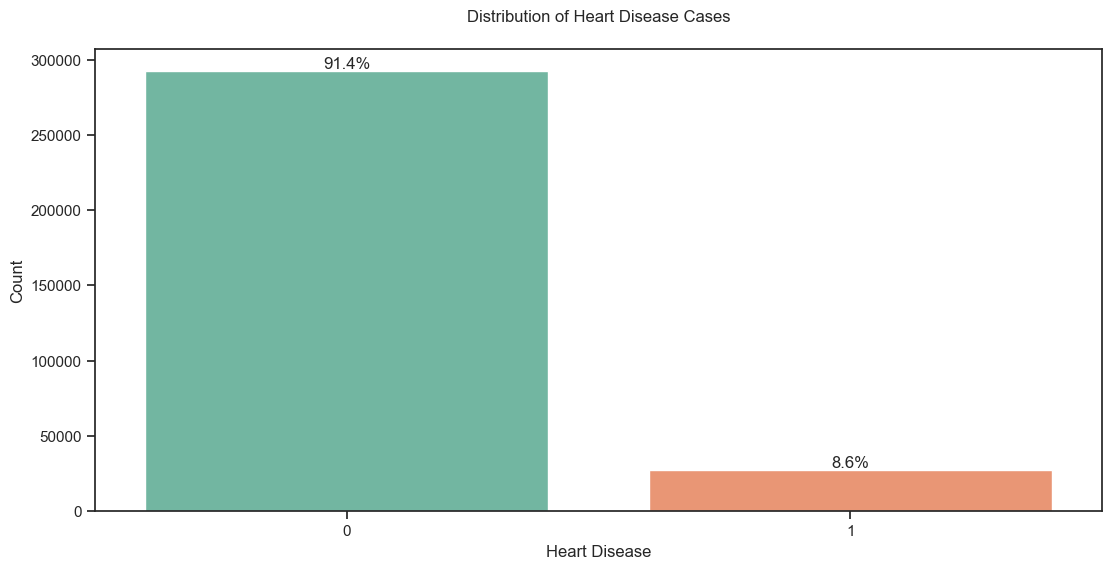

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure
plt.figure(figsize=(13, 6))

# Create histogram/count plot with updated syntax
sns.countplot(data=df, x='HeartDisease', hue='HeartDisease', palette='Set2', legend=False)

# Calculate percentages
total = len(df['HeartDisease'])
percentages = df['HeartDisease'].value_counts(normalize=True) * 100

# Add percentage labels on top of each bar
for i, percentage in enumerate(percentages):
    plt.text(i, df['HeartDisease'].value_counts()[i],
             f'{percentage:.1f}%',
             horizontalalignment='center',
             verticalalignment='bottom')

# Customize the plot
plt.title('Distribution of Heart Disease Cases', pad=20)
plt.xlabel('Heart Disease')
plt.ylabel('Count')

# Show plot
plt.show()

The graph reveals a significant class imbalance where 91.4% (approximately 280,000 individuals) do not have heart disease, while only 8.6% (around 25,000 individuals) have heart disease.

### Distribution of Heart Disease by Race
Create a bar plot to show the distribution of heart disease cases across different racial groups, allowing us to identify any potential patterns or disparities in heart disease prevalence among different ethnic groups

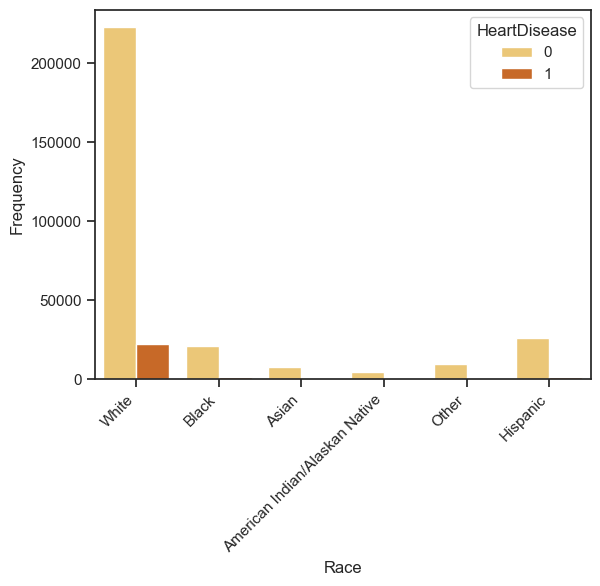

In [162]:
sns.countplot(data=df, x='Race', hue='HeartDisease', palette='YlOrBr')
plt.xlabel('Race')
plt.ylabel('Frequency')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.show()


The graph shows that White individuals make up the largest portion of the dataset with approximately 220,000 cases, while other racial groups have significantly smaller representations. All racial groups maintain a similar proportion of heart disease cases relative to their population size.
This visualization, while providing demographic information, doesn't offer much predictive value for our heart disease analysis. The similar proportions of heart disease cases across all racial groups suggest that race alone is not a strong differentiating factor for heart disease risk in our dataset. This observation is further supported by the correlation matrix we examined earlier, which showed race had a weak negative correlation (-0.04) with heart disease.
Due to this low informational value and potential for introducing bias without adding predictive power, we'll remove this feature from our dataset now to ensure it doesn't influence our subsequent analyses and modeling.

In [163]:
# Remove Race column from dataset as it doesn't provide significant predictive value
df = df.drop('Race', axis=1)
print(f"Race column removed. Dataset now has {df.shape[1]} columns.")
display(df)

Race column removed. Dataset now has 17 columns.


HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                  0  16.60        1                0       0             3.0   
1                  0  20.34        0                0       1             0.0   
2                  0  26.58        1                0       0            20.0   
3                  0  24.21        0                0       0             0.0   
4                  0  23.71        0                0       0            28.0   
...              ...    ...      ...              ...     ...             ...   
319790             1  27.41        1                0       0             7.0   
319791             0  29.84        1                0       0             0.0   
319792             0  24.24        0                0       0             0.0   
319793             0  32.81        0                0       0             0.0   
319794             0  46.56        0                0       0             0.0   

        MentalHealth  DiffWalking     Sex AgeCategory Diabetic  \
0               30.0            0  Female       50-59      Yes   
1                0.0            0  Female         80+       No   
2               30.0            0    Male       60-69      Yes   
3                0.0            0  Female       70-79       No   
4                0.0            1  Female       40-49       No   
...              ...          ...     ...         ...      ...   
319790           0.0            1    Male       60-69      Yes   
319791           0.0            0    Male       30-39       No   
319792           0.0            0  Female       40-49       No   
319793           0.0            0  Female       18-29       No   
319794           0.0            0  Female         80+       No   

        PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  \
0                      1  Very good        5.0       1              0   
1                      1  Very good        7.0       0              0   
2                      1       Fair        8.0       1              0   
3                      0       Good        6.0       0              0   
4                      1  Very good        8.0       0              0   
...                  ...        ...        ...     ...            ...   
319790                 0       Fair        6.0       1              0   
319791                 1  Very good        5.0       1              0   
319792                 1       Good        6.0       0              0   
319793                 0       Good       12.0       0              0   
319794                 1       Good        8.0       0              0   

        SkinCancer  
0                1  
1                0  
2                0  
3                1  
4                0  
...            ...  
319790           0  
319791           0  
319792           0  
319793           0  
319794           0  

[319561 rows x 17 columns]

### Distribution of Heart Disease by Sex
Create a bar plot comparing the distribution of heart disease between males and females to understand if there are any gender-based differences in heart disease prevalence.

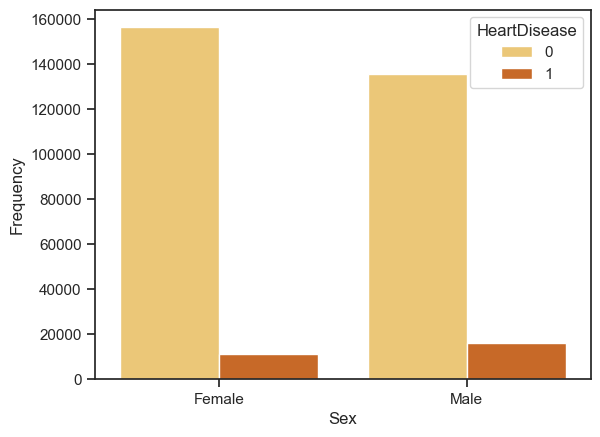

In [164]:
sns.countplot(data=df, x='Sex', hue='HeartDisease', palette='YlOrBr')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

The visualization shows that females have a slightly higher total frequency (approximately 155,000 cases) compared to males (approximately 135,000 cases). Both genders display a similar pattern of heart disease distribution, with the majority not having heart disease.

### Distribution of Heart Disease by Age Category
Create a bar plot to examine how heart disease prevalence varies across different age groups, using ordered age categories to show the progression of risk with age.

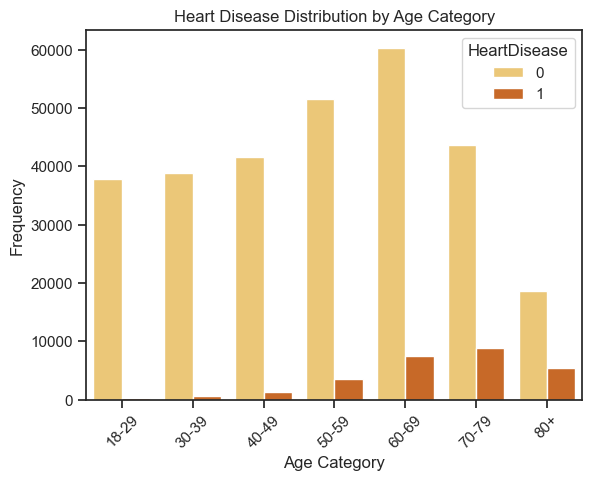

In [165]:
# create ordered list of age categories
age_order = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']

# create the countplot with ordered categories
sns.countplot(data=df, x='AgeCategory', hue='HeartDisease',
              palette='YlOrBr', order=age_order)
plt.xlabel('Age Category')
plt.ylabel('Frequency')
plt.title('Heart Disease Distribution by Age Category')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

The 60-69 age group has the highest frequency with approximately 60,000 cases, followed by the 50-59 age group. The incidence of heart disease (represented by lighter brown) increases notably with age, showing higher proportions in older age groups (60-69, 70-79, and 80+).

## Correlation Matrix of Health Variables
Create a correlation matrix heatmap to visualize the relationships between various health-related variables, helping identify which factors are most strongly associated with heart disease.


First we convert the non-numeric columns to numeric columns for the correlation matrix.


In [166]:
df_copy = df.copy()

# Sex mapping
df_copy['Sex'] = df_copy['Sex'].replace({'Male': 1, 'Female': 0})

# Age mapping
age_map = {
    '18-29': 1,
    '30-39': 2,
    '40-49': 3,
    '50-59': 4,
    '60-69': 5,
    '70-79': 6,
    '80+': 7
}
df_copy['AgeCategory'] = df_copy['AgeCategory'].replace(age_map)

# Diabetic mapping
diabetic_mapping = {
    'No': 0,
    'No, borderline diabetes': 1,
    'Yes (during pregnancy)': 2,
    'Yes': 3
}
df_copy['Diabetic'] = df_copy['Diabetic'].replace(diabetic_mapping)

# General Health mapping
genhealth_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very good': 3,
    'Excellent': 4
}

df_copy['GenHealth'] = df_copy['GenHealth'].replace(genhealth_mapping)
df_copy['Sex'] = df_copy['Sex'].replace({'Male': 1, 'Female': 0}).astype(int)
display(df_copy)

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                  0  16.60        1                0       0             3.0   
1                  0  20.34        0                0       1             0.0   
2                  0  26.58        1                0       0            20.0   
3                  0  24.21        0                0       0             0.0   
4                  0  23.71        0                0       0            28.0   
...              ...    ...      ...              ...     ...             ...   
319790             1  27.41        1                0       0             7.0   
319791             0  29.84        1                0       0             0.0   
319792             0  24.24        0                0       0             0.0   
319793             0  32.81        0                0       0             0.0   
319794             0  46.56        0                0       0             0.0   

        MentalHealth  DiffWalking  Sex AgeCategory Diabetic  PhysicalActivity  \
0               30.0            0    0           4        3                 1   
1                0.0            0    0           7        0                 1   
2               30.0            0    1           5        3                 1   
3                0.0            0    0           6        0                 0   
4                0.0            1    0           3        0                 1   
...              ...          ...  ...         ...      ...               ...   
319790           0.0            1    1           5        3                 0   
319791           0.0            0    1           2        0                 1   
319792           0.0            0    0           3        0                 1   
319793           0.0            0    0           1        0                 0   
319794           0.0            0    0           7        0                 1   

       GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0              3        5.0       1              0           1  
1              3        7.0       0              0           0  
2              1        8.0       1              0           0  
3              2        6.0       0              0           1  
4              3        8.0       0              0           0  
...          ...        ...     ...            ...         ...  
319790         1        6.0       1              0           0  
319791         3        5.0       1              0           0  
319792         2        6.0       0              0           0  
319793         2       12.0       0              0           0  
319794         2        8.0       0              0           0  

[319561 rows x 17 columns]

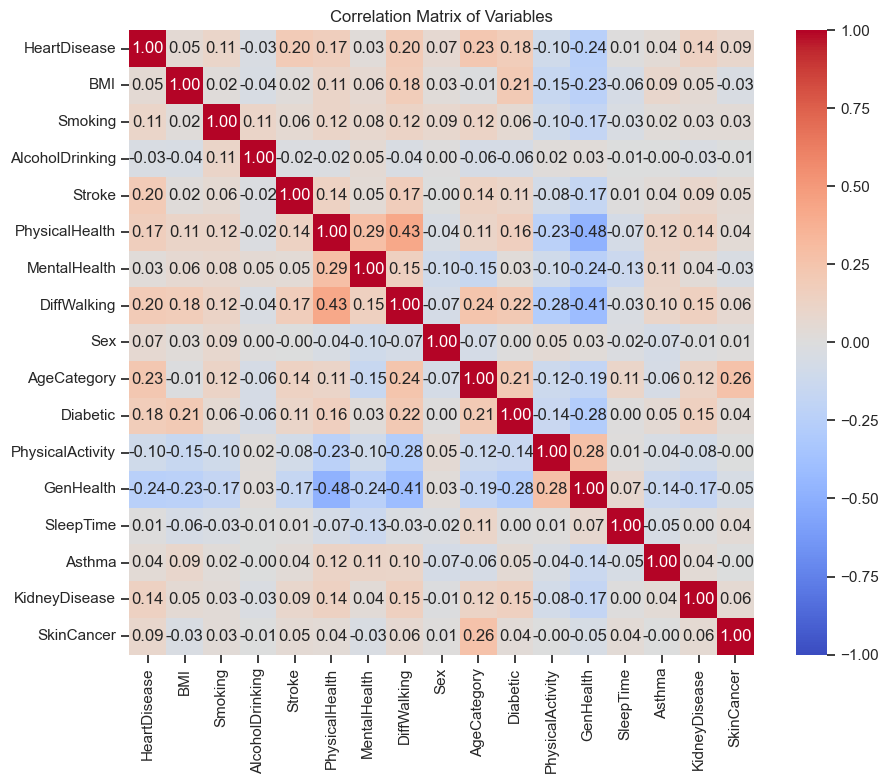

In [167]:
# Create correlation matrix
correlation_matrix = df_copy.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,  # show correlation values
            cmap='coolwarm',  # color scheme
            center=0,  # center the colormap at 0
            fmt='.2f',  # show 2 decimal places
            square=True,  # make the plot square-shaped
            vmin=-1, vmax=1)  # set the range of values

plt.title('Correlation Matrix of Variables')
plt.tight_layout()
plt.show()

This correlation matrix shows the relationships between various health-related variables, with stronger correlations indicated by darker colors and numerical values ranging from -1 to 1. The most notable correlations with heart disease (HeartDisease) include: age category (0.23), stroke (0.20), difficulty walking (0.20), physical health (0.17), and diabetic status (0.18), while showing negative correlations with general health (-0.24) and physical activity (-0.10). There's a particularly strong negative correlation (-0.48) between physical health and general health, suggesting that poor physical health significantly impacts overall health perception. Interestingly, factors like BMI (0.05) and alcohol drinking (-0.03) (-0.04) show relatively weak correlations with heart disease.

## Investigating Multicollinearity Using VIF Analysis
To ensure the reliability of our predictive models, we conducted a Variance Inflation Factor (VIF) analysis on key health variables. The VIF measures how much the variance of a regression coefficient is inflated due to multicollinearity with other predictors.
Our analysis focused on General Health status and Physical Health, which showed moderate correlation in our earlier correlation matrix analysis (-0.48).


In [168]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import numpy as np

# First, let's create a new DataFrame with just the columns we need
# This helps us avoid modifying the original DataFrame
df_vif = pd.DataFrame()

# Convert GenHealth to numeric values
genhealth_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very good': 3,
    'Excellent': 4
}
df_vif['GenHealth_numeric'] = df['GenHealth'].replace(genhealth_mapping).astype(float)

# Ensure PhysicalHealth is numeric and handle any non-numeric values
df_vif['PhysicalHealth'] = pd.to_numeric(df['PhysicalHealth'], errors='coerce')

# Drop any rows with NaN values to ensure clean data for VIF calculation
df_vif = df_vif.dropna()

# Add a constant column for VIF calculation
X = add_constant(df_vif)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF data
print("VIF Data:")
print(vif_data)

# If you want to calculate VIF after dropping a feature
X_dropped = add_constant(df_vif[['PhysicalHealth']])
vif_data_dropped = pd.DataFrame()
vif_data_dropped["Feature"] = X_dropped.columns
vif_data_dropped["VIF"] = [variance_inflation_factor(X_dropped.values, i) for i in range(X_dropped.shape[1])]

print("\nVIF Data after dropping GenHealth_numeric:")
print(vif_data_dropped)

VIF Data:
             Feature        VIF
0              const  10.639505
1  GenHealth_numeric   1.302905
2     PhysicalHealth   1.302905

VIF Data after dropping GenHealth_numeric:
          Feature       VIF
0           const  1.179549
1  PhysicalHealth  1.000000


The results indicate low multicollinearity between these variables, with VIF values of approximately 1.30 for both features. In statistical practice, VIF values below 5 (or even 2.5 in more conservative approaches) are generally considered acceptable. Our values are well below these thresholds, suggesting that each variable contributes unique information to our model.
When we removed GenHealth_numeric from the analysis, the VIF for PhysicalHealth predictably dropped to 1.0, confirming the absence of multicollinearity when only one predictor remains (apart from the constant).
This analysis supports our decision to retain both variables in our predictive models, as they each provide distinct information about patient health status that could be valuable for heart disease prediction, despite their moderate negative correlation.

## Statistical Significance Testing: Comparing Physical Activity and Difficulty Walking

Let's run T-test on the columns PhysicalActivity, DiffWalking for Equal Means:
Both of the columns are very similar in their meaning and has strong correlations.
This test can help you understand if the difference between the two columns is statistically significant. If the distributions are very similar, it might indicate that one feature can be removed without losing much predictive power.

In [169]:
from scipy.stats import ttest_ind

t_stat, p_value_ttest = ttest_ind(df['PhysicalActivity'], df['DiffWalking'])

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value of T-test: {p_value_ttest:.3f}")

T-statistic: 664.727
P-value of T-test: 0.000


The T-test results show a very large T-statistic of 664.097 and a p-value of 0.000, indicating a statistically significant difference between the means of PhysicalActivity and DiffWalking. This suggests that the two variables provide distinct information and are not redundant. Therefore, it may not be appropriate to drop either column, as both could be valuable for predictive modeling, representing different aspects of the data.

## Heart Disease Distribution by Lifestyle Habits
Create a bar plot showing the percentage of heart disease cases across different combinations of smoking and alcohol consumption habits.

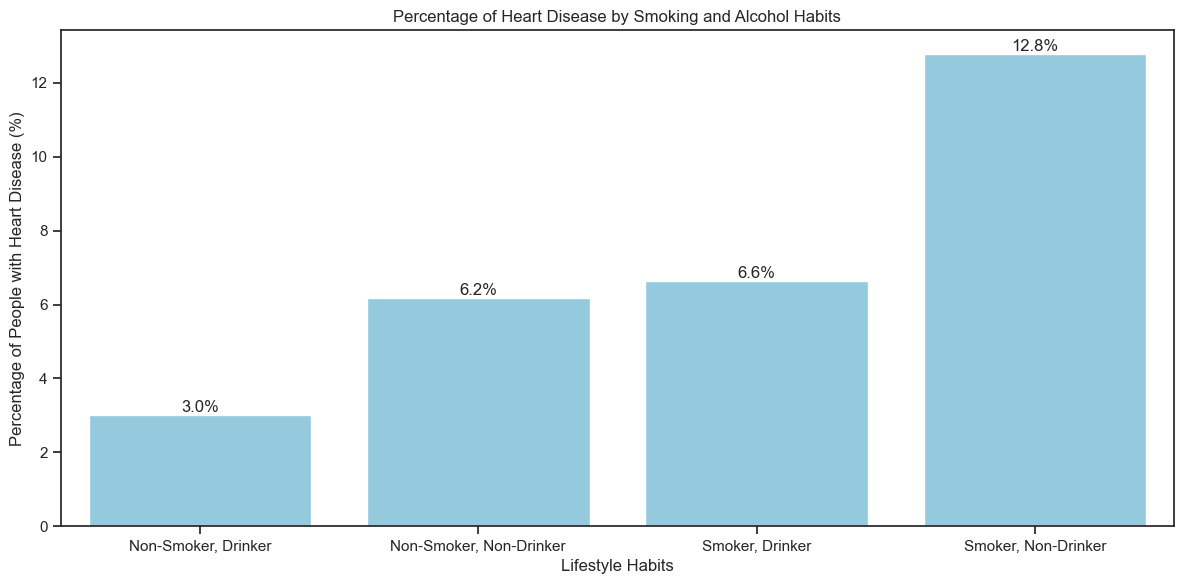

In [170]:
# read the data again to avoid changes that affect the next graph
df_smoke_drink = pd.read_csv('heart_2020_cleaned.csv')

# create a new column combining smoking and alcohol status
df_smoke_drink['Habits'] = (df_smoke_drink['Smoking'].map({'Yes': 'Smoker', 'No': 'Non-Smoker'}) + ', ' +
                            df_smoke_drink['AlcoholDrinking'].map({'Yes': 'Drinker', 'No': 'Non-Drinker'}))

# calculate heart disease percentage for each combination
heart_disease_stats = df_smoke_drink.groupby('Habits')['HeartDisease'].apply(
    lambda x: (x == 'Yes').mean() * 100).reset_index()

# sort values for better visualization
heart_disease_stats = heart_disease_stats.sort_values('HeartDisease')

# create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Habits',
                 y='HeartDisease',
                 data=heart_disease_stats,
                 color='skyblue')

# add percentage labels on top of each bar
for i, v in enumerate(heart_disease_stats['HeartDisease']):
    ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.title('Percentage of Heart Disease by Smoking and Alcohol Habits')
plt.xlabel('Lifestyle Habits')

plt.ylabel('Percentage of People with Heart Disease (%)')

plt.tight_layout()
plt.show()

Smokers who don't drink have the highest prevalence of heart disease (12.8%), while non-smokers who drink show the lowest (3.0%). This aligns with the correlation matrix which showed smoking had a positive correlation with heart disease (0.11), indicating increased risk. Interestingly, alcohol drinking showed a very weak negative correlation (-0.03), explaining why categories involving drinking (non-smoker drinker at 3.0% and smoker drinker at 6.6%) show lower heart disease percentages than their non-drinking counterparts.

## Distribution of Heart Disease by Physical Activity and Health Status
Create a bar plot comparing heart disease rates across different combinations of physical activity levels and general health status.


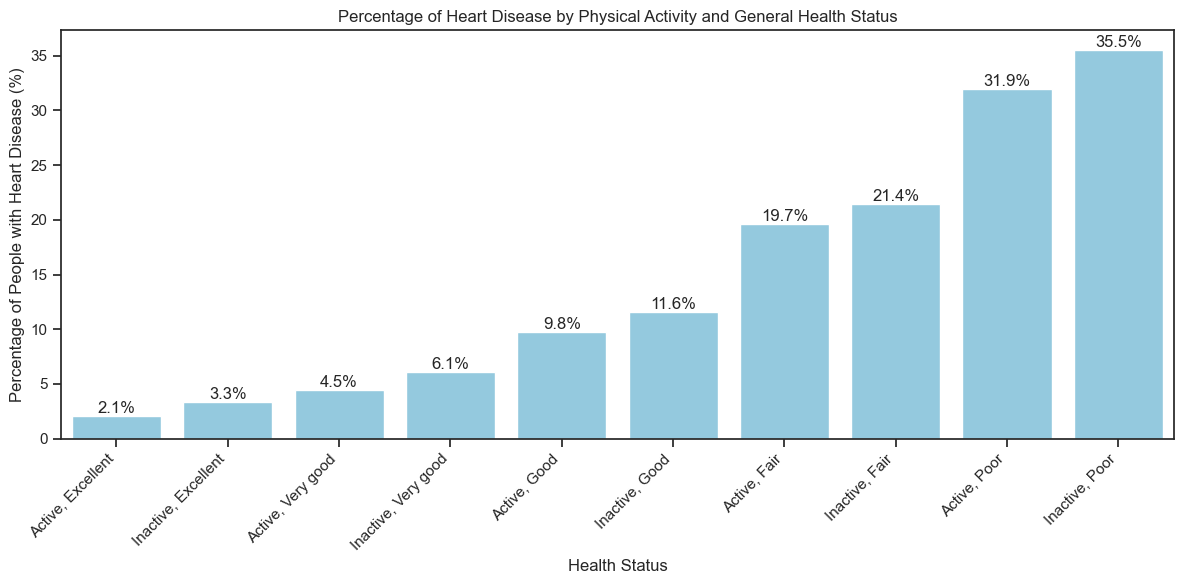

In [171]:
# read the data again to avoid changes that affect the next graph
df_physic_gen = pd.read_csv('heart_2020_cleaned.csv')

# create a new column combining physical activity and general health status
df_physic_gen['Health_Status'] = (df_physic_gen['PhysicalActivity'].map({'Yes': 'Active', 'No': 'Inactive'}) + ', ' +
                                  df_physic_gen['GenHealth'])

# calculate heart disease percentage for each combination
heart_disease_stats = df_physic_gen.groupby('Health_Status')['HeartDisease'].apply(
    lambda x: (x == 'Yes').mean() * 100).reset_index()

# sort values for better visualization
heart_disease_stats = heart_disease_stats.sort_values('HeartDisease')

# create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Health_Status',
                 y='HeartDisease',
                 data=heart_disease_stats,
                 color='skyblue')

# add percentage labels on top of each bar
for i, v in enumerate(heart_disease_stats['HeartDisease']):
    ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.title('Percentage of Heart Disease by Physical Activity and General Health Status')
plt.xlabel('Health Status')
plt.ylabel('Percentage of People with Heart Disease (%)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

The data shows a progression from 2.1% (active, excellent health) to 35.5% (inactive, poor health) in heart disease risk. This pattern aligns with the correlation matrix, which showed negative correlations between heart disease and both physical activity (-0.10) and general health (-0.24), indicating that better health status and physical activity are associated with lower heart disease risk. The stronger correlation with general health is reflected in the more dramatic increases in heart disease rates as health status declines

## Distribution of Heart Disease by Physical and Mental Health Days
Create a bar plot showing how heart disease prevalence varies with different combinations of physical and mental health issue days.

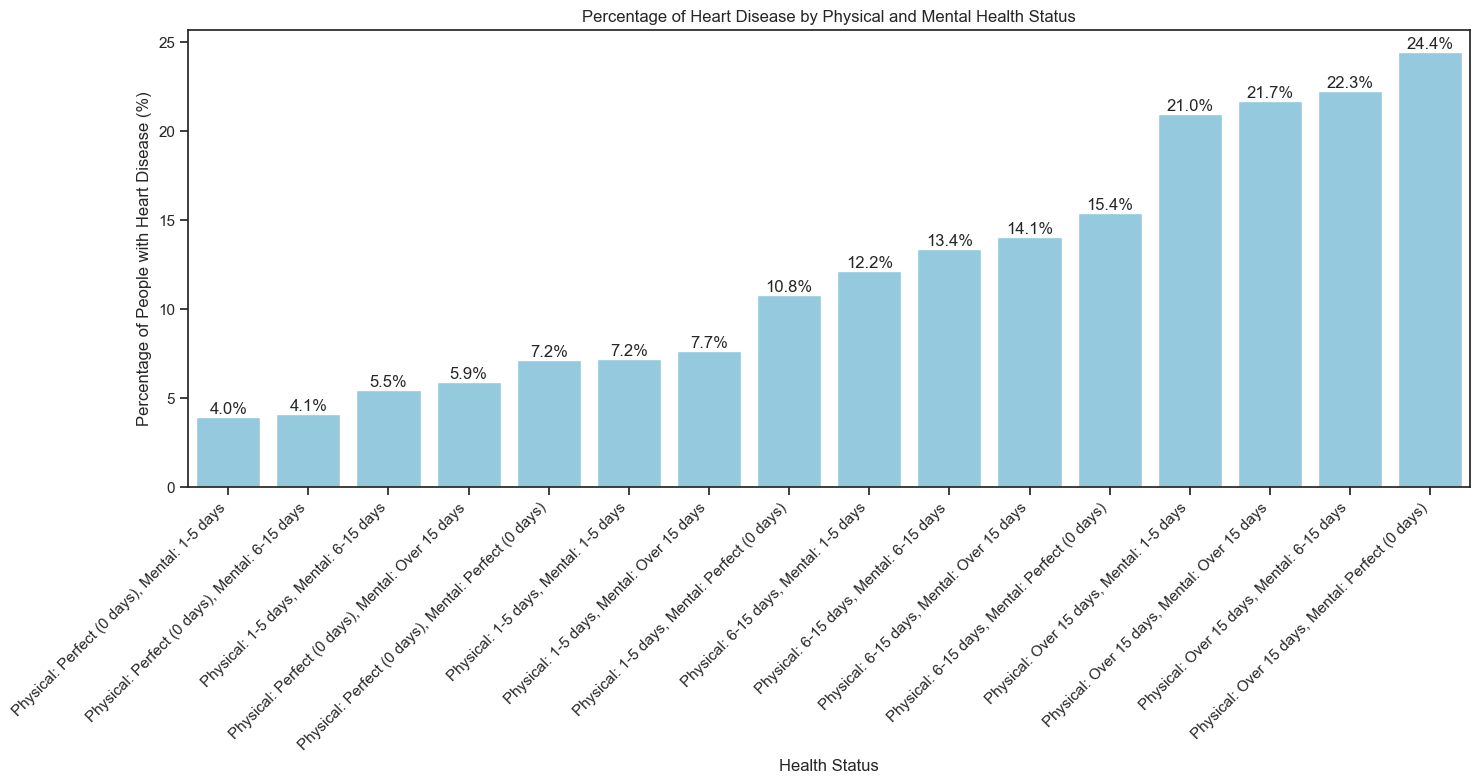

In [172]:
# read the data again to avoid changes that affect the next graph
df_physic_mental = pd.read_csv('heart_2020_cleaned.csv')


# create categories for Physical and Mental Health
def categorize_health(value):
    if value == 0:
        return 'Perfect (0 days)'
    elif value <= 5:
        return '1-5 days'
    elif value <= 15:
        return '6-15 days'
    else:
        return 'Over 15 days'


# create new columns with categorized health values
df_physic_mental['PhysicalHealth_Cat'] = df_physic_mental['PhysicalHealth'].apply(categorize_health)
df_physic_mental['MentalHealth_Cat'] = df_physic_mental['MentalHealth'].apply(categorize_health)

# create a new column combining both health categories
df_physic_mental['Health_Status'] = 'Physical: ' + df_physic_mental['PhysicalHealth_Cat'] + ', Mental: ' + \
                                    df_physic_mental['MentalHealth_Cat']

# calculate heart disease percentage for each combination
heart_disease_stats = df_physic_mental.groupby('Health_Status')['HeartDisease'].apply(
    lambda x: (x == 'Yes').mean() * 100).reset_index()

# sort values for better visualization
heart_disease_stats = heart_disease_stats.sort_values('HeartDisease')

# create a bar plot
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Health_Status',
                 y='HeartDisease',
                 data=heart_disease_stats,
                 color='skyblue')

# add percentage labels on top of each bar
for i, v in enumerate(heart_disease_stats['HeartDisease']):
    ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.title('Percentage of Heart Disease by Physical and Mental Health Status')
plt.xlabel('Health Status')
plt.ylabel('Percentage of People with Heart Disease (%)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Heart disease rates increase from 4.0% (perfect physical health, minimal mental health issues) to 24.4% (over 15 days of both issues). The correlation matrix supports these patterns, showing physical health had a stronger correlation (0.17) with heart disease compared to mental health (0.03). This explains why we see larger jumps in heart disease rates when physical health days increase versus changes in mental health days

## Heart Disease by Diabetes and Stroke Status

Create a bar plot comparing heart disease rates across different combinations of diabetes and stroke conditions.

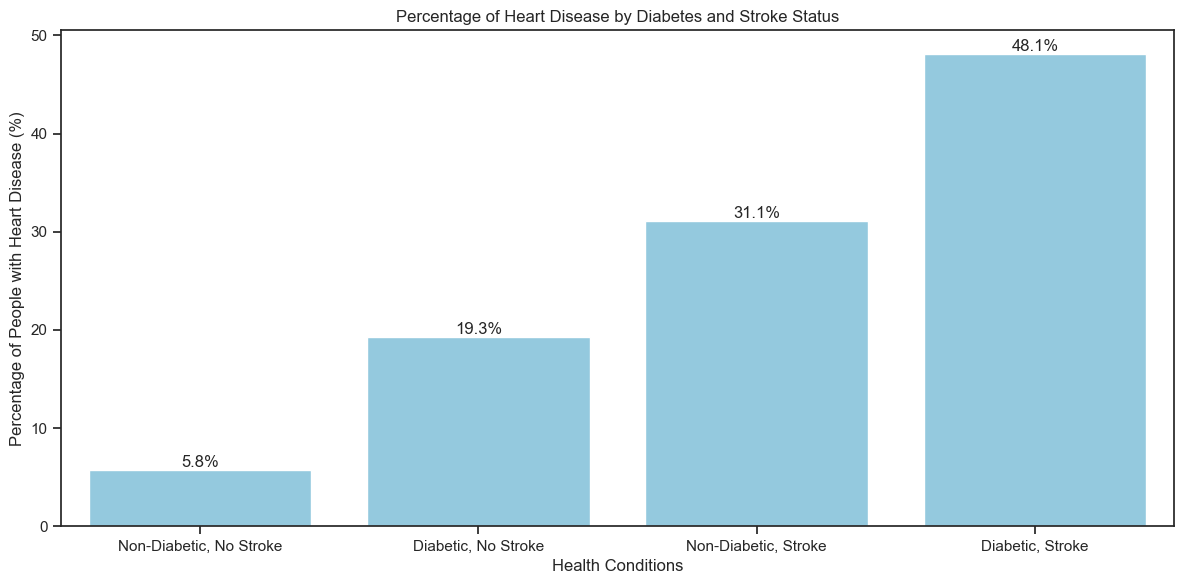

In [173]:
# read the data again to avoid changes that affect the next graph
df_diabetic_stroke = pd.read_csv('heart_2020_cleaned.csv')

# create a combination of health conditions
df_diabetic_stroke['Health_Conditions'] = (
        df_diabetic_stroke['Diabetic'].map({'Yes': 'Diabetic', 'No': 'Non-Diabetic'}) + ', ' +
        df_diabetic_stroke['Stroke'].map({'Yes': 'Stroke', 'No': 'No Stroke'}))

# calculate heart disease percentage for each combination
heart_disease_stats = df_diabetic_stroke.groupby('Health_Conditions')['HeartDisease'].apply(
    lambda x: (x == 'Yes').mean() * 100).reset_index()

# sort values for better visualization
heart_disease_stats = heart_disease_stats.sort_values('HeartDisease')

# create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Health_Conditions',
                 y='HeartDisease',
                 data=heart_disease_stats,
                 color='skyblue')

# add percentage labels on top of each bar
for i, v in enumerate(heart_disease_stats['HeartDisease']):
    ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.title('Percentage of Heart Disease by Diabetes and Stroke Status')
plt.xlabel('Health Conditions')
plt.ylabel('Percentage of People with Heart Disease (%)')

plt.tight_layout()
plt.show()

The progression from 5.8% (neither condition) to 48.1% (both conditions) aligns with the correlation matrix, where both diabetes (0.18) and stroke (0.20) showed positive correlations with heart disease. The slightly higher correlation for stroke is reflected in its stronger individual impact (31.1% vs 19.3% for diabetes alone).

## BMI Distribution by Heart Disease Status

Create a density plot comparing BMI distributions between people with and without heart disease.

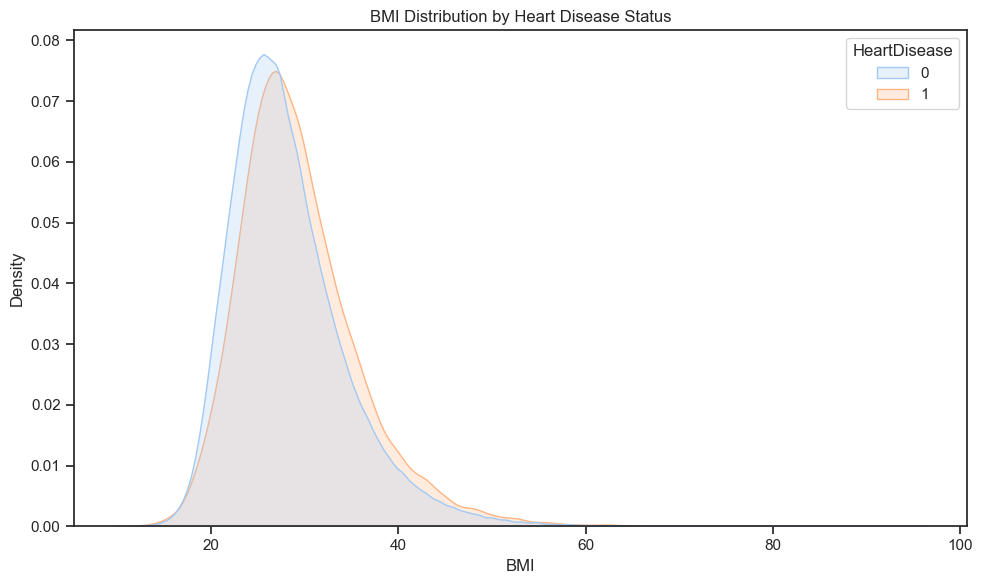

In [51]:
# create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='BMI', hue='HeartDisease', fill=True, common_norm=False)

plt.title('BMI Distribution by Heart Disease Status')
plt.xlabel('BMI')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

The KDE plot of BMI distribution by heart disease status shows a similar right-skewed pattern for both groups, with individuals having heart disease slightly skewed towards a higher BMI. While this suggests a potential link between BMI and heart disease, the significant overlap between distributions indicates that BMI alone may not be a strong predictor. Further statistical analysis, such as an ANOVA test, can help determine if the difference in BMI between those with and without heart disease is statistically significant.

## ANOVA Testing: Comparing BMI Distribution Between Heart Disease Groups


In [143]:
from scipy.stats import f_oneway

df_balanced = pd.read_csv('heart_2020_cleaned.csv')
df_balanced = df_balanced.dropna(subset=["BMI"])

df_filtered = df_balanced.dropna(subset=["BMI"])  # Remove NaNs from BMI
df_filtered["HeartDisease"] = df_filtered["HeartDisease"].map({"No": 0, "Yes": 1})
bmi_no_heart_disease = df_filtered[df_filtered["HeartDisease"] == 0]["BMI"]
bmi_with_heart_disease = df_filtered[df_filtered["HeartDisease"] == 1]["BMI"]


# Perform ANOVA test
stat, p_value = f_oneway(bmi_no_heart_disease, bmi_with_heart_disease)

# Print results
print(f"ANOVA Statistic: {stat:.4f}, p-value: {p_value:.4f}")

['BMI', 'PhysicalHealth', 'MentalHealth', 'HeartDisease_Yes', 'Smoking_Yes', 'AlcoholDrinking_Yes', 'Stroke_Yes', 'DiffWalking_Yes', 'Sex_Male', 'AgeCategory_25-29', 'AgeCategory_30-34', 'AgeCategory_35-39', 'AgeCategory_40-44', 'AgeCategory_45-49', 'AgeCategory_50-54', 'AgeCategory_55-59', 'AgeCategory_60-64', 'AgeCategory_65-69', 'AgeCategory_70-74', 'AgeCategory_75-79', 'AgeCategory_80 or older', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes', 'Diabetic_Yes (during pregnancy)', 'PhysicalActivity_Yes', 'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor', 'GenHealth_Very good', 'Asthma_Yes', 'KidneyDisease_Yes', 'SkinCancer_Yes']
ANOVA Statistic: 860.4963, p-value: 0.0000


The ANOVA test indicates a statistically significant difference in BMI between individuals with and without heart disease (F = 860.4963, p < 0.0001). This suggests that BMI is a relevant factor in heart disease prediction

## Kidney Disease Distribution by Heart Disease Status

Create a density plot showing the distribution of kidney disease among individuals with and without heart disease.

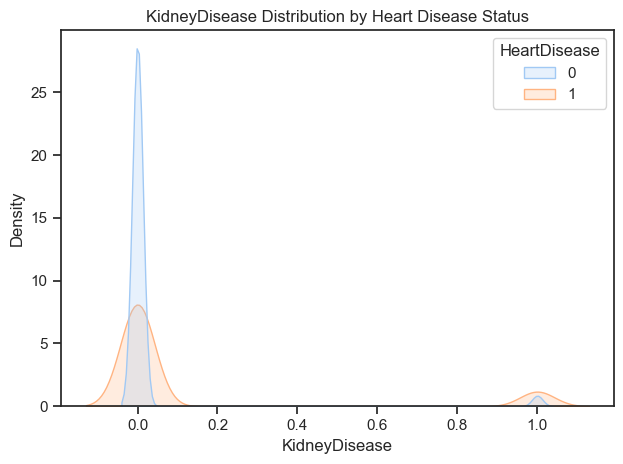

In [53]:
sns.kdeplot(data=df, x='KidneyDisease', hue='HeartDisease', fill=True, common_norm=False)

plt.title('KidneyDisease Distribution by Heart Disease Status')
plt.xlabel('KidneyDisease')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

The correlation matrix showed a positive correlation (0.15) between kidney disease and heart disease, which is reflected in the relatively higher density at 1 for the heart disease group, though the overall prevalence remains low in both groups.

## Sleep Time Distribution by Heart Disease Status

Create a density plot comparing sleep patterns between those with and without heart disease.


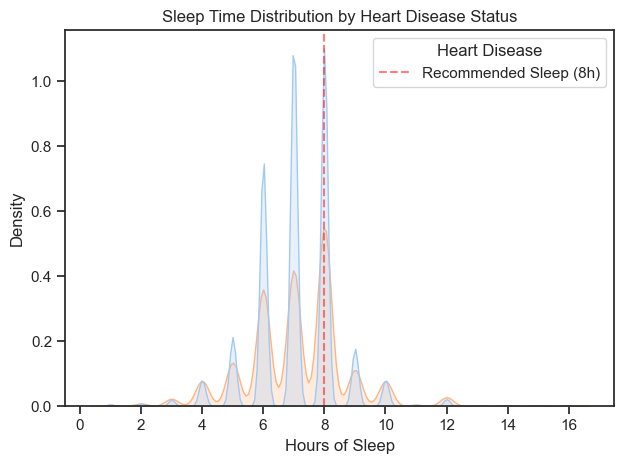

In [54]:
sns.kdeplot(data=df, x='SleepTime', hue='HeartDisease', fill=True, common_norm=False)

plt.title('Sleep Time Distribution by Heart Disease Status')
plt.xlabel('Hours of Sleep')
plt.ylabel('Density')

# Add vertical line for recommended sleep (8 hours)
plt.axvline(x=8, color='red', linestyle='--', alpha=0.5, label='Recommended Sleep (8h)')
plt.legend(title='Heart Disease')

plt.tight_layout()
plt.show()

This density plot shows the distribution of sleep hours comparing individuals with and without heart disease, with a red dashed line indicating the recommended 8 hours of sleep. The distribution is multimodal (showing multiple peaks) with the highest concentration around 7-8 hours of sleep for both groups. People without heart disease (shown in blue) have slightly higher peaks at the recommended sleep duration, while those with heart disease (shown in grey) show a more spread out distribution with lower peaks. However, the overall similar patterns between both groups align with the very weak correlation (0.01) found in the correlation matrix between sleep time and heart disease. The plot suggests that sleep duration alone may not be a strong predictor of heart disease risk, though there's a slight tendency for people without heart disease to maintain more regular sleep patterns closer to the recommended 8 hours.

## BMI vs Sleep Time by Heart Disease Status

Create two separate density plots comparing the BMI-sleep relationship for people with and without heart disease.


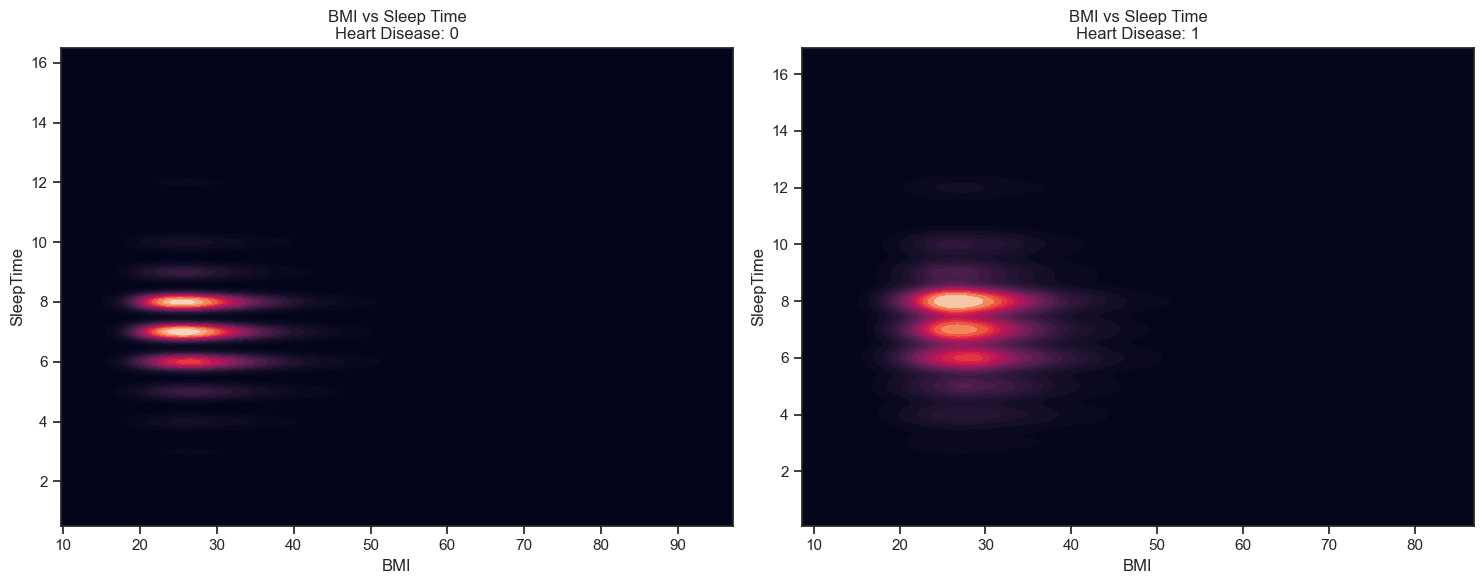

In [56]:
# separate plots by Heart Disease status for BMI vs Sleep Time
plt.figure(figsize=(15, 6))
for i, condition in enumerate(df['HeartDisease'].unique()):
    plt.subplot(1, 2, i + 1)
    subset = df[df['HeartDisease'] == condition]
    sns.kdeplot(
        data=subset, x="BMI", y="SleepTime",
        fill=True, thresh=0, levels=20, cmap="rocket"
    )
    plt.title(f'BMI vs Sleep Time\nHeart Disease: {condition}')

plt.tight_layout()
plt.show()

These two density plots compare the relationship between BMI and sleep time for people with heart disease (left) and without heart disease (right). In both groups, there are similar patterns of horizontal bands showing common sleep durations between 5-10 hours. However, there are some notable differences: people with heart disease (left plot) show a slightly higher concentration in the higher BMI ranges (30-40), indicated by the brighter red areas, while those without heart disease (right plot) have their highest concentrations in the lower BMI ranges (20-30). Both plots show multiple bands of sleep duration, suggesting that sleep patterns are similar regardless of BMI or heart disease status, which aligns with the weak correlations we saw earlier in the correlation matrix (BMI with heart disease: 0.05, sleep time with heart disease: 0.01).

## Cohen's d Effect Size Analysis: Sleep Time and Heart Disease
Let's assess whether sleep duration is essential for prediction using Cohen’s d. This metric quantifies the effect size by measuring the difference between two group means in terms of standard deviation, offering insight into the practical significance of the variation.


In [106]:
df["SleepTime"].dropna(inplace=True)
# Group Sleep Time by Heart Disease Status
group1 = df[df["HeartDisease"] == 0]["SleepTime"]
group2 = df[df["HeartDisease"] == 1]["SleepTime"]

# Compute Mean and Standard Deviation for Each Group
mean1, mean2 = np.mean(group1), np.mean(group2)
std1, std2 = np.std(group1, ddof=1), np.std(group2, ddof=1)

# Compute Pooled Standard Deviation
n1, n2 = len(group1), len(group2)
sp = np.sqrt(((n1 - 1) * std1 ** 2 + (n2 - 1) * std2 ** 2) / (n1 + n2 - 2))

# Compute Cohen’s d
cohen_d = (mean1 - mean2) / sp
print(f"Cohen's d: {cohen_d:.4f} (Effect Size)")

Cohen's d: -0.0202 (Effect Size)


The Cohen’s d value of -0.0202 indicates a very small effect size, meaning the difference in sleep duration between individuals with and without heart disease is minimal and likely not practically significant. This suggests that while there may be a statistical difference, sleep duration alone is not a strong differentiator for heart disease risk.
Given this extremely small effect size and the negligible correlation we observed earlier (0.01), we'll remove the SleepTime variable from our dataset to simplify our model and focus on more influential predictors of heart disease.


In [107]:
df = df.drop('SleepTime', axis=1)
print(f"SleepTime column removed. Dataset now has {df.shape[1]} columns.")

SleepTime column removed. Dataset now has 16 columns.


HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                  0  16.60        1                0       0             3.0   
1                  0  20.34        0                0       1             0.0   
2                  0  26.58        1                0       0            20.0   
3                  0  24.21        0                0       0             0.0   
4                  0  23.71        0                0       0            28.0   
...              ...    ...      ...              ...     ...             ...   
319790             1  27.41        1                0       0             7.0   
319791             0  29.84        1                0       0             0.0   
319792             0  24.24        0                0       0             0.0   
319793             0  32.81        0                0       0             0.0   
319794             0  46.56        0                0       0             0.0   

        MentalHealth  DiffWalking     Sex AgeCategory Diabetic  \
0               30.0            0  Female       50-59      Yes   
1                0.0            0  Female         80+       No   
2               30.0            0    Male       60-69      Yes   
3                0.0            0  Female       70-79       No   
4                0.0            1  Female       40-49       No   
...              ...          ...     ...         ...      ...   
319790           0.0            1    Male       60-69      Yes   
319791           0.0            0    Male       30-39       No   
319792           0.0            0  Female       40-49       No   
319793           0.0            0  Female       18-29       No   
319794           0.0            0  Female         80+       No   

        PhysicalActivity  GenHealth  Asthma  KidneyDisease  SkinCancer  
0                      1  Very good       1              0           1  
1                      1  Very good       0              0           0  
2                      1       Fair       1              0           0  
3                      0       Good       0              0           1  
4                      1  Very good       0              0           0  
...                  ...        ...     ...            ...         ...  
319790                 0       Fair       1              0           0  
319791                 1  Very good       1              0           0  
319792                 1       Good       0              0           0  
319793                 0       Good       0              0           0  
319794                 1       Good       0              0           0  

[319561 rows x 16 columns]

## BMI vs Physical Health by Heart Disease Status

Create density plots comparing the relationship between BMI and physical health days for those with and without heart disease.


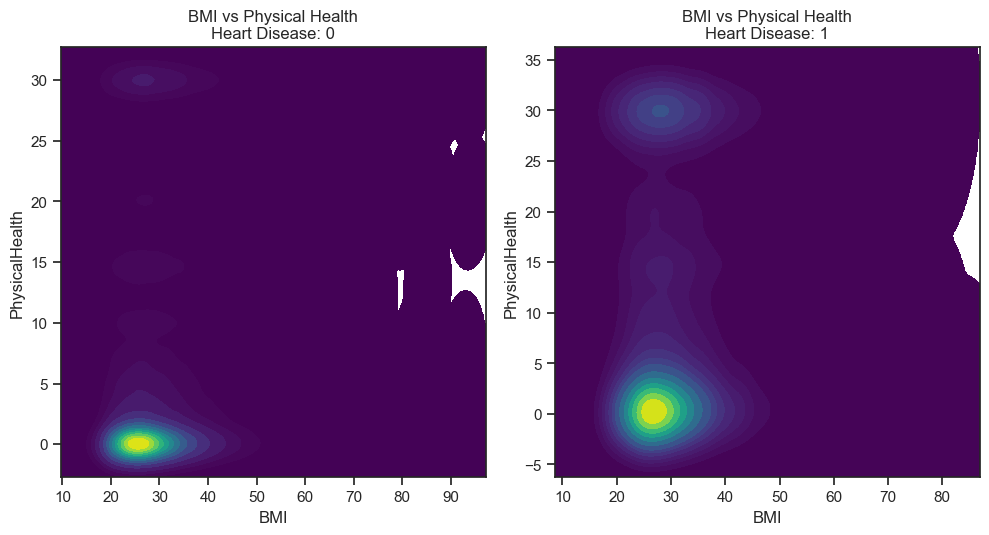

In [57]:
# create separate plots for each Heart Disease category
plt.figure(figsize=(15, 10))
for i, health in enumerate(df['HeartDisease'].unique()):
    plt.subplot(2, 3, i + 1)
    subset = df[df['HeartDisease'] == health]
    sns.kdeplot(
        data=subset, x="BMI", y="PhysicalHealth",
        fill=True, thresh=0, levels=15, cmap="viridis"
    )
    plt.title(f'BMI vs Physical Health\nHeart Disease: {health}')

plt.tight_layout()
plt.show()

These density plots compare BMI and Physical Health days between individuals with and without heart disease. The left plot (Heart Disease: 0) shows a concentrated cluster at lower BMI (20-30) and fewer physical health issue days, indicating healthier patterns. The right plot (Heart Disease: 1) reveals two distinct concentrations: one with low physical health days and normal BMI, and another showing higher physical health days, suggesting more health challenges in people with heart disease. These patterns align with the correlation matrix, which showed physical health had a moderate correlation with heart disease (0.17), while BMI showed a weaker correlation (0.05), highlighting that physical health issues may be a better indicator of heart disease risk than BMI alone.

## Physical Health vs Mental Health by Heart Disease Status



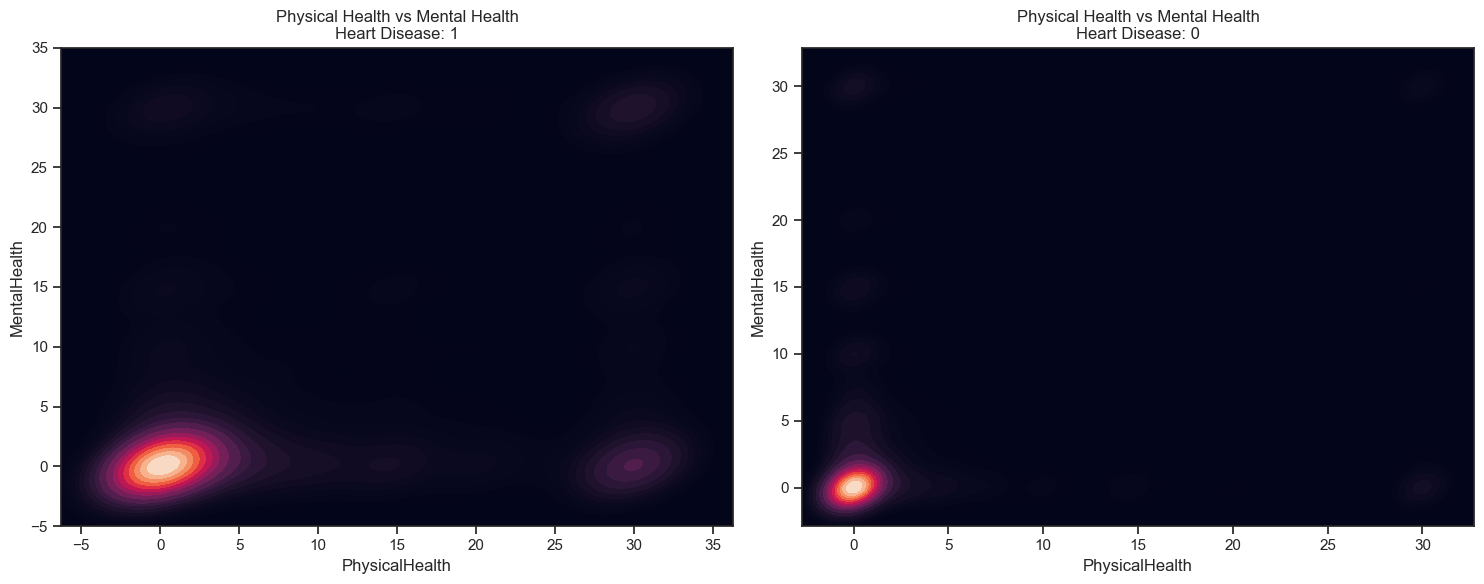

In [58]:
# Physical and Mental Health Impact
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(
    data=df[df['HeartDisease'] == 1],
    x="PhysicalHealth", y="MentalHealth",
    fill=True, thresh=0, levels=20, cmap="rocket",
)
plt.title(f'Physical Health vs Mental Health\nHeart Disease: 1')

plt.subplot(1, 2, 2)
sns.kdeplot(
    data=df[df['HeartDisease'] == 0],
    x="PhysicalHealth", y="MentalHealth",
    fill=True, thresh=0, levels=20, cmap="rocket",
)
plt.title(f'Physical Health vs Mental Health\nHeart Disease: 0')
plt.tight_layout()
plt.show()

The right plot (without heart disease) shows a strong concentration near zero for both health metrics, indicating most healthy individuals experience few poor health days. The left plot (with heart disease) shows more dispersion with multiple hotspots, including significant densities at higher numbers of both physical and mental health days. This pattern aligns with the correlation matrix where physical health showed stronger correlation with heart disease (0.17) than mental health (0.03), though the visualization suggests these factors often occur together in heart disease patients.
To further assess potential multicollinearity and ensure both features contribute independently to the model, we will use the Variance Inflation Factor (VIF), which confirms that these variables do not exhibit significant collinearity.

## Multicollinearity Analysis: Variance Inflation Factor (VIF)
The following code calculates the Variance Inflation Factor (VIF) for our numerical health metrics to assess potential multicollinearity between these variables. VIF helps identify how much the variance of an estimated regression coefficient increases if predictors are correlated, with higher values indicating stronger multicollinearity issues.

In [142]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Copy the dataset
df_vif = df.copy()

# Select only numerical features for VIF analysis
selected_features = ["PhysicalHealth", "MentalHealth"]

# Create a new DataFrame with only selected features
df_vif = df_vif[selected_features]

# Drop any missing values
df_vif = df_vif.dropna()

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(len(df_vif.columns))]

# Display the results
print(vif_data)

['BMI', 'PhysicalHealth', 'MentalHealth', 'HeartDisease_Yes', 'Smoking_Yes', 'AlcoholDrinking_Yes', 'Stroke_Yes', 'DiffWalking_Yes', 'Sex_Male', 'AgeCategory_25-29', 'AgeCategory_30-34', 'AgeCategory_35-39', 'AgeCategory_40-44', 'AgeCategory_45-49', 'AgeCategory_50-54', 'AgeCategory_55-59', 'AgeCategory_60-64', 'AgeCategory_65-69', 'AgeCategory_70-74', 'AgeCategory_75-79', 'AgeCategory_80 or older', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes', 'Diabetic_Yes (during pregnancy)', 'PhysicalActivity_Yes', 'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor', 'GenHealth_Very good', 'Asthma_Yes', 'KidneyDisease_Yes', 'SkinCancer_Yes']
          Feature       VIF
0  PhysicalHealth  1.201927
1    MentalHealth  1.201927


The VIF analysis for PhysicalHealth and MentalHealth resulted in low values (1.20 for both), indicating no significant multicollinearity between them. This suggests that both features contribute independently to the model and are not redundant. Since they provide unique information, there is no need to remove either feature, and both can be retained for further analysis and model training.

# 3D Relationship between Physical Health, Mental Health, BMI, and Heart Disease
Create a 3D scatter plot to visualize the complex relationship between physical health, mental health, BMI, and heart disease status, using different colors to distinguish between cases.


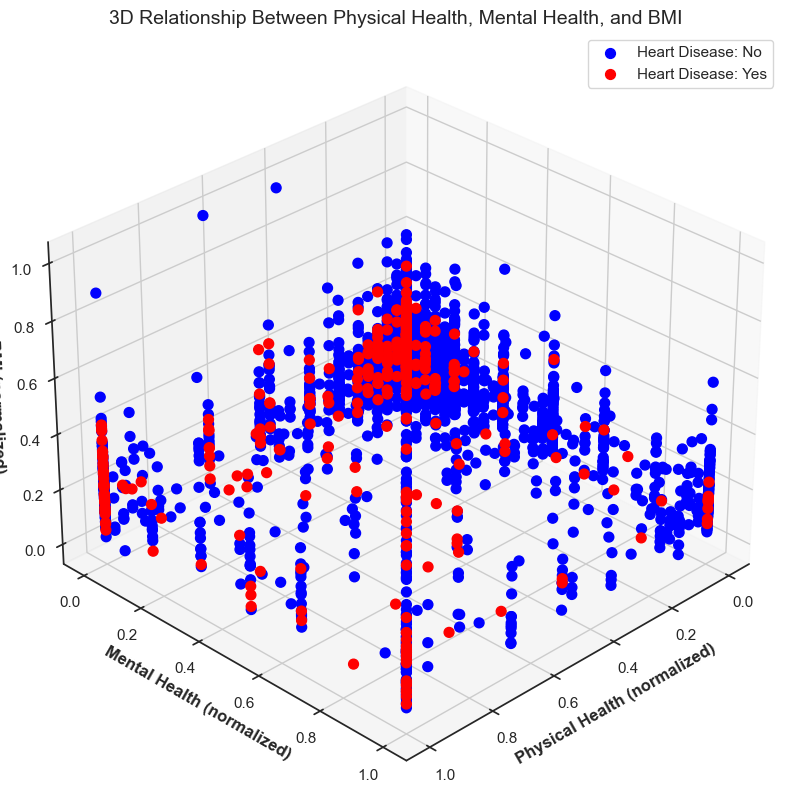

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# First, reload the dataset
df = pd.read_csv('heart_2020_cleaned.csv')

plt.close('all')

# Convert HeartDisease column to consistent Yes/No strings
df['HeartDisease'] = df['HeartDisease'].map({'Yes': 'Yes', 'No': 'No'})

# Sample the data since plotting all points would be overwhelming
sample_size = 5000  # Adjust sample size as needed
df_sampled = df.sample(n=sample_size, random_state=42)

# Normalize features to 0-1 range for better visualization
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_sampled[['PhysicalHealth', 'MentalHealth', 'BMI']])
df_sampled[['PhysicalHealth_scaled', 'MentalHealth_scaled', 'BMI_scaled']] = scaled_features

# Create 3D plot with lighter background for better contrast
plt.close('all')
fig = plt.figure(figsize=(12, 10), facecolor='white')
ax = fig.add_subplot(111, projection='3d')

# Define distinct colors with high contrast
colors = {'No': 'blue', 'Yes': 'red'}

# Plot each category separately
for disease_status in df_sampled['HeartDisease'].unique():
    mask = df_sampled['HeartDisease'] == disease_status
    ax.scatter(
        df_sampled[mask]['PhysicalHealth_scaled'],
        df_sampled[mask]['MentalHealth_scaled'],
        df_sampled[mask]['BMI_scaled'],
        c=colors[disease_status],
        label=f'Heart Disease: {disease_status}',
        alpha=1.0,  # Full opacity for better visibility
        s=50  # Larger point size for visibility
    )

# Customize axes labels
ax.set_xlabel('Physical Health (normalized)', fontweight='bold')
ax.set_ylabel('Mental Health (normalized)', fontweight='bold')
ax.set_zlabel('BMI (normalized)', fontweight='bold')

plt.title('3D Relationship Between Physical Health, Mental Health, and BMI', fontsize=14)
plt.legend()

# Try different viewing angles to better see the data distribution
for angle in [(30, 45), (30, 120), (20, 210), (45, 300)]:
    ax.view_init(elev=angle[0], azim=angle[1])
    plt.draw()
    plt.pause(0.5)  # Display each angle for half a second

plt.show()

The 3D plot reveals that heart disease cases (red points) are more prevalent among individuals with higher physical health issues, while showing a weaker association with mental health metrics. Points form vertical clustering patterns due to discrete day-count values in the original data. The visualization confirms the stronger correlation between physical health and heart disease (0.17) compared to mental health (0.03). While heart disease cases appear across various BMI values, they show some concentration in higher ranges, demonstrating the complex, non-linear interactions between these health factors.

# BMI Distribution by General Health and Heart Disease Status
Create a boxplot showing BMI distributions across different general health categories, split by heart disease status.



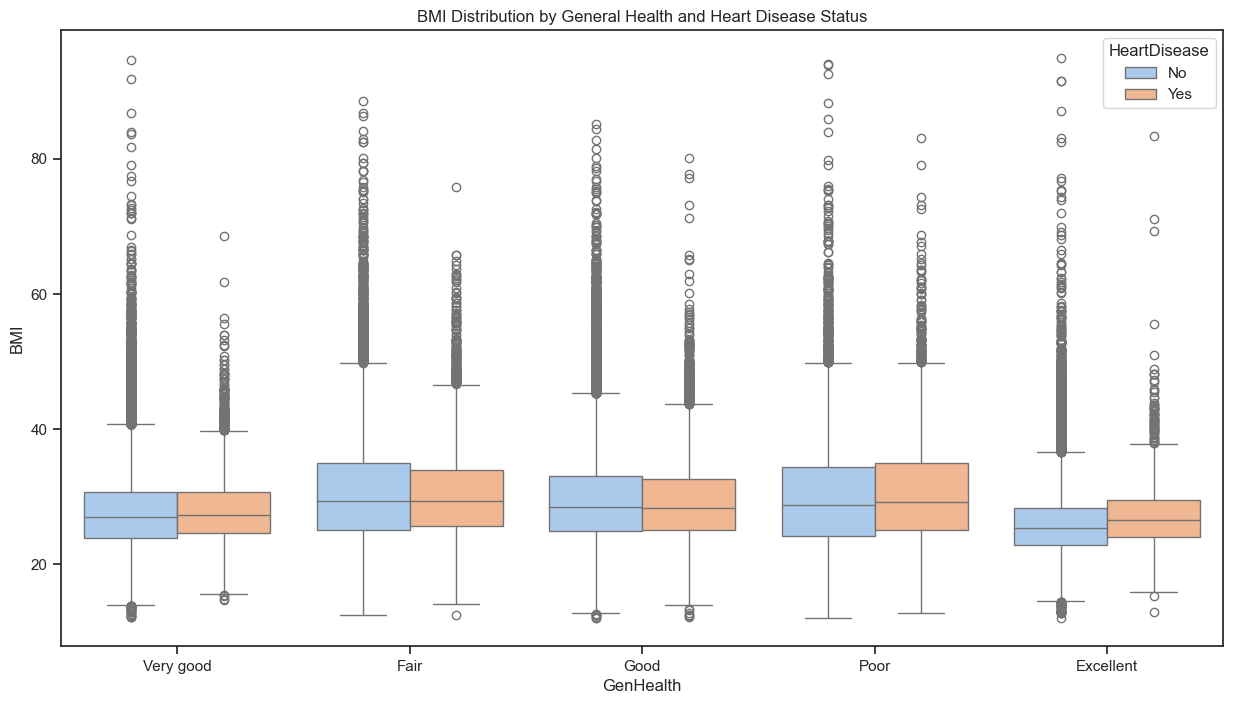

In [60]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="GenHealth", y="BMI", hue="HeartDisease", data=df)
plt.title('BMI Distribution by General Health and Heart Disease Status')
plt.show()

Across all general health categories (Excellent, Very good, Good, Fair, Poor), there's a consistent pattern where individuals with better general health ratings tend to have lower BMI values. The medians and distributions of BMI gradually increase as general health ratings decline, with Fair and Poor health categories showing the highest median BMIs and widest ranges. When comparing those with and without heart disease, people with heart disease consistently show slightly higher BMI medians within each health category, though this difference is most pronounced in the Fair and Poor health categories. All health categories display outliers at high BMI values, with particularly extreme outliers (reaching BMI values of 80+) appearing in the Fair and Poor health categories. However, the relatively similar distributions between heart disease and non-heart disease groups across health categories aligns with the weak correlation (0.05) between BMI and heart disease found in the correlation matrix, suggesting that while BMI has some relationship with both general health and heart disease, it's not a strongly determining factor on its own.

# Physical Health Distribution by Asthma and Heart Disease Status
Create a violin plot showing physical health distributions across asthma status, split by heart disease presence.

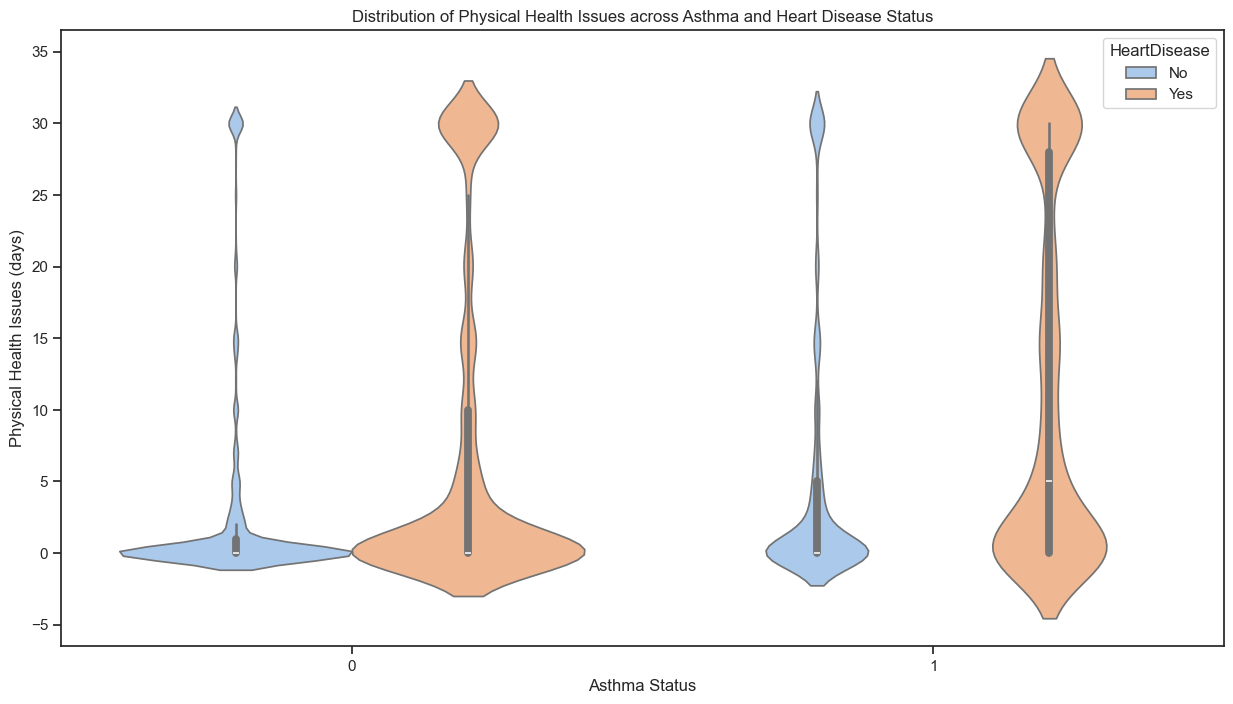

In [190]:
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(15, 8))
sns.violinplot(x="Asthma", y="PhysicalHealth", hue="HeartDisease", data=df)
plt.title('Distribution of Physical Health Issues across Asthma and Heart Disease Status')
plt.xlabel('Asthma Status')
plt.ylabel('Physical Health Issues (days)')
plt.show()

The violin plot demonstrates the complex relationship between physical health issues, asthma, and heart disease. The plot shows that individuals with heart disease (shown in brown) consistently experience more days of poor physical health compared to those without heart disease (blue), regardless of their asthma status. Among those with heart disease, the distribution is wider and shows a higher concentration of days with physical health problems. When looking at asthma's impact, asthmatic individuals display more symmetrical and concentrated distributions of physical health issues, while non-asthmatics show more spread in their patterns. The combined presence of both conditions appears to have a compounding effect, with individuals having both heart disease and asthma showing the highest concentration of physical health issues, while those with neither condition report the fewest days of poor physical health. These patterns align with the correlation matrix findings, where heart disease showed a stronger correlation with physical health (0.17) compared to asthma's weaker correlation (0.04), indicating that heart disease has a more significant impact on physical health than asthma.

# Relationship between Age and BMI for Asthma Patients by Heart Disease Status
Create a contour plot with marginal distributions to visualize how age and BMI relate specifically for asthma patients, with separate distributions for those with and without heart disease.


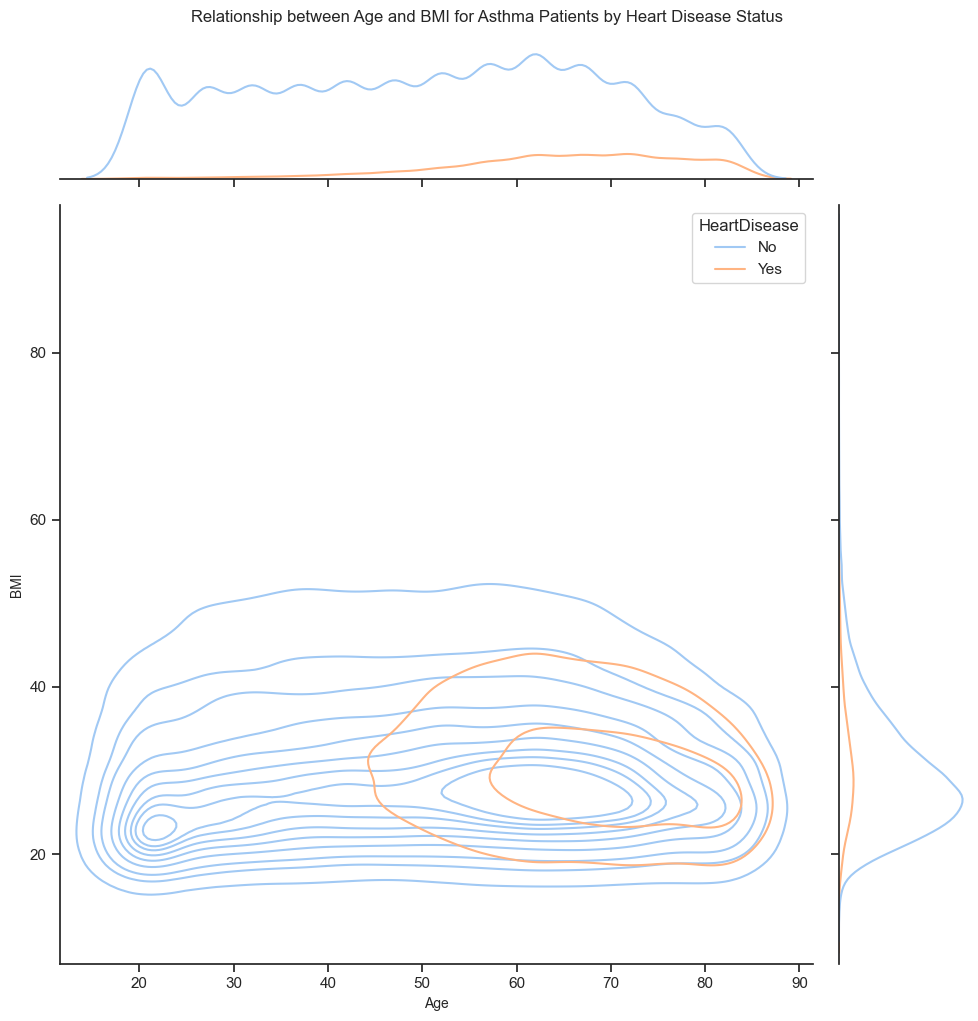

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset
df_age_astma = pd.read_csv('heart_2020_cleaned.csv')

# age mapping (converting categorical age to numeric)
age_mapping = {
    '18-24': 21,
    '25-29': 27,
    '30-34': 32,
    '35-39': 37,
    '40-44': 42,
    '45-49': 47,
    '50-54': 52,
    '55-59': 57,
    '60-64': 62,
    '65-69': 67,
    '70-74': 72,
    '75-79': 77,
    '80 or older': 82
}

# create new column with numeric age
df_age_astma['AgeNumeric'] = df_age_astma['AgeCategory'].map(age_mapping)

# filter data for skin cancer cases
astma = df_age_astma[df_age_astma['Asthma'] == 'Yes']

# create the joint plot with modified parameters
g = sns.jointplot(data=astma,
                  x="AgeNumeric",
                  y="BMI",
                  hue="HeartDisease",
                  kind="kde",
                  height=10)

plt.suptitle('Relationship between Age and BMI for Asthma Patients by Heart Disease Status',
             y=1.02,
             fontsize=12)

# improve axis labels
g.ax_joint.set_xlabel('Age', fontsize=10)
g.ax_joint.set_ylabel('BMI', fontsize=10)

plt.show()

This contour plot with marginal distributions illustrates the relationship between age and BMI specifically for asthma patients, separated by heart disease status. The central plot shows density contours (blue for no heart disease, orange for heart disease) while the top and right margins display the distributions of age and BMI respectively. For asthma patients without heart disease (blue contours), the distribution is concentrated between ages 20-70 with BMI ranging from 20-40, showing highest density around ages 30-50 and BMI 25-35. Those with both asthma and heart disease (orange contours) tend to be older, with distributions shifted towards the 50-80 age range, while maintaining similar BMI ranges, though slightly skewing higher. The marginal distributions clearly demonstrate that among asthma patients, those with heart disease tend to be older, with a subtle trend toward higher BMI values. This aligns with the correlation matrix findings, which showed weak correlations between heart disease and both BMI (0.05) and asthma (0.04), suggesting these relationships exist but aren't strongly predictive.

# PCA (Principal Component Analysis)



PCA is applied to reduce the dimensionality of the health metrics (BMI, PhysicalHealth, MentalHealth, GenHealth) while retaining the most significant variance. This helps identify underlying patterns in the data and determine whether these metrics effectively differentiate individuals based on sex and age. By transforming the data into principal components, we can evaluate the importance of each feature and assess whether sex and age plays a meaningful role in the overall variance of health-related factors.

## Focused PCA with Health Metrics Colored by Sex Category

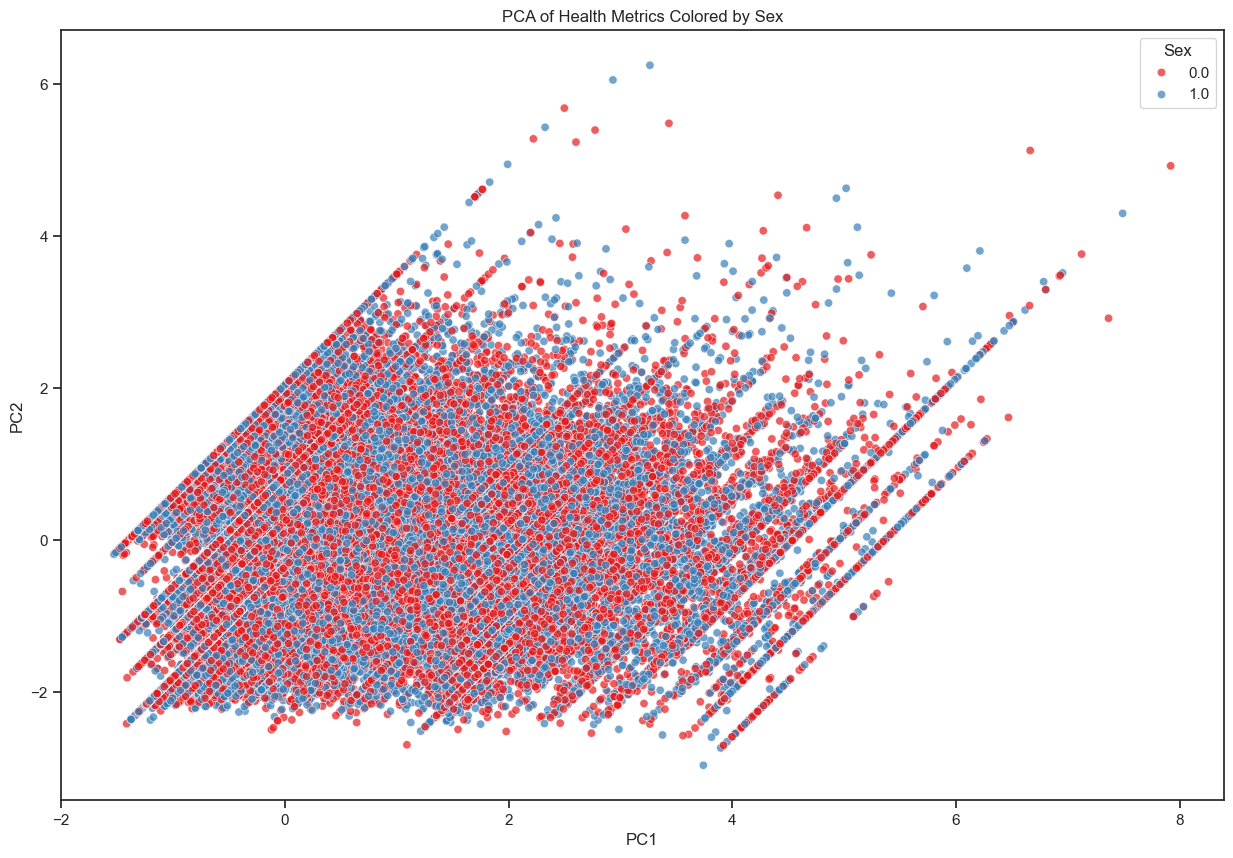

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Copy dataset
df_copy = df.copy()

# Convert categorical features to numerical
df_copy['Sex'] = df_copy['Sex'].replace({'Male': 1, 'Female': 0}).astype(int)

# Convert GenHealth to numerical values
genhealth_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very good': 3,
    'Excellent': 4
}
df_copy['GenHealth'] = df_copy['GenHealth'].replace(genhealth_mapping)

# Select only the intended numerical columns
numerical_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'GenHealth']
X = df_copy[numerical_cols]  # Ensure we are only using 4 features

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create DataFrame for PCA results
principalDf = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add HeartDisease and Sex columns for analysis
principalDf['HeartDisease'] = df_copy['HeartDisease']
principalDf['Sex'] = df_copy['Sex']

# Plot PCA scatterplot
plt.figure(figsize=(15, 10))
sns.scatterplot(data=principalDf,
                x="PC1",
                y="PC2",
                hue="Sex",
                palette="Set1",
                alpha=0.7)

plt.title('PCA of Health Metrics Colored by Sex')
plt.show()

The PCA scatter plot shows a high degree of overlap between males and females, indicating that sex does not significantly separate within the reduced feature space. This suggests that the selected health metrics do not vary meaningfully based on sex, making it a weak differentiating factor in this context.

### Explained Variance and PCA Loadings

variance ratio helps determine whether the first two principal components retain enough information from the original dataset. If they capture a significant portion of the variance, PCA can effectively reduce dimensionality without losing critical data.

In [179]:
# Print the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")
print(f"Total Variance Captured by PC1 & PC2: {sum(explained_variance[:2]) * 100:.2f}%")

Explained Variance Ratio: [0.33333485 0.25651563]
Total Variance Captured by PC1 & PC2: 58.99%


The PCA analysis shows that the first two components capture 58.99% of the variance, meaning 42% of the information is lost in this dimensionality reduction. The scatter plot indicates no clear separation between sexes, suggesting that sex does not significantly influence these health-related features.


PCA loadings, reveal which features contribute the most to the principal components, helping identify dominant variables and potential feature correlations. These approaches ensure that PCA is both effective and interpretable, guiding decisions on whether to adjust the number of components or refine feature

In [180]:
# Create a DataFrame for PCA loadings
loadings = pd.DataFrame(pca.components_.T,
                        index=numerical_cols,
                        columns=['PC1', 'PC2'])

# Display the loadings
print("PCA Loadings:")
print(loadings)

PCA Loadings:
                     PC1       PC2
BMI             0.342752  0.500162
PhysicalHealth  0.677155 -0.106694
MentalHealth    0.649617 -0.094180
GenHealth      -0.044490  0.854157


PhysicalHealth (0.677) and MentalHealth (0.649) have the highest contributions to PC1, indicating they account for most of the variance in this component. In contrast, GenHealth (0.854) and BMI (0.500) primarily influence PC2, representing a distinct variance dimension. The similar loadings of PhysicalHealth and MentalHealth suggest potential overlap. However, based on the KDE plot analysis and VIF calculations, both features independently contribute to the model and are not redundant.

## Focused PCA with Health Metrics Colored by Age Category
Finally, we'll examine the same health metrics (BMI, PhysicalHealth, MentalHealth, GenHealth) but now coloring by age category to understand how these health relationships vary across different age groups.

Explained variance ratio: [0.44101589 0.24073207]
Total explained variance: 0.68


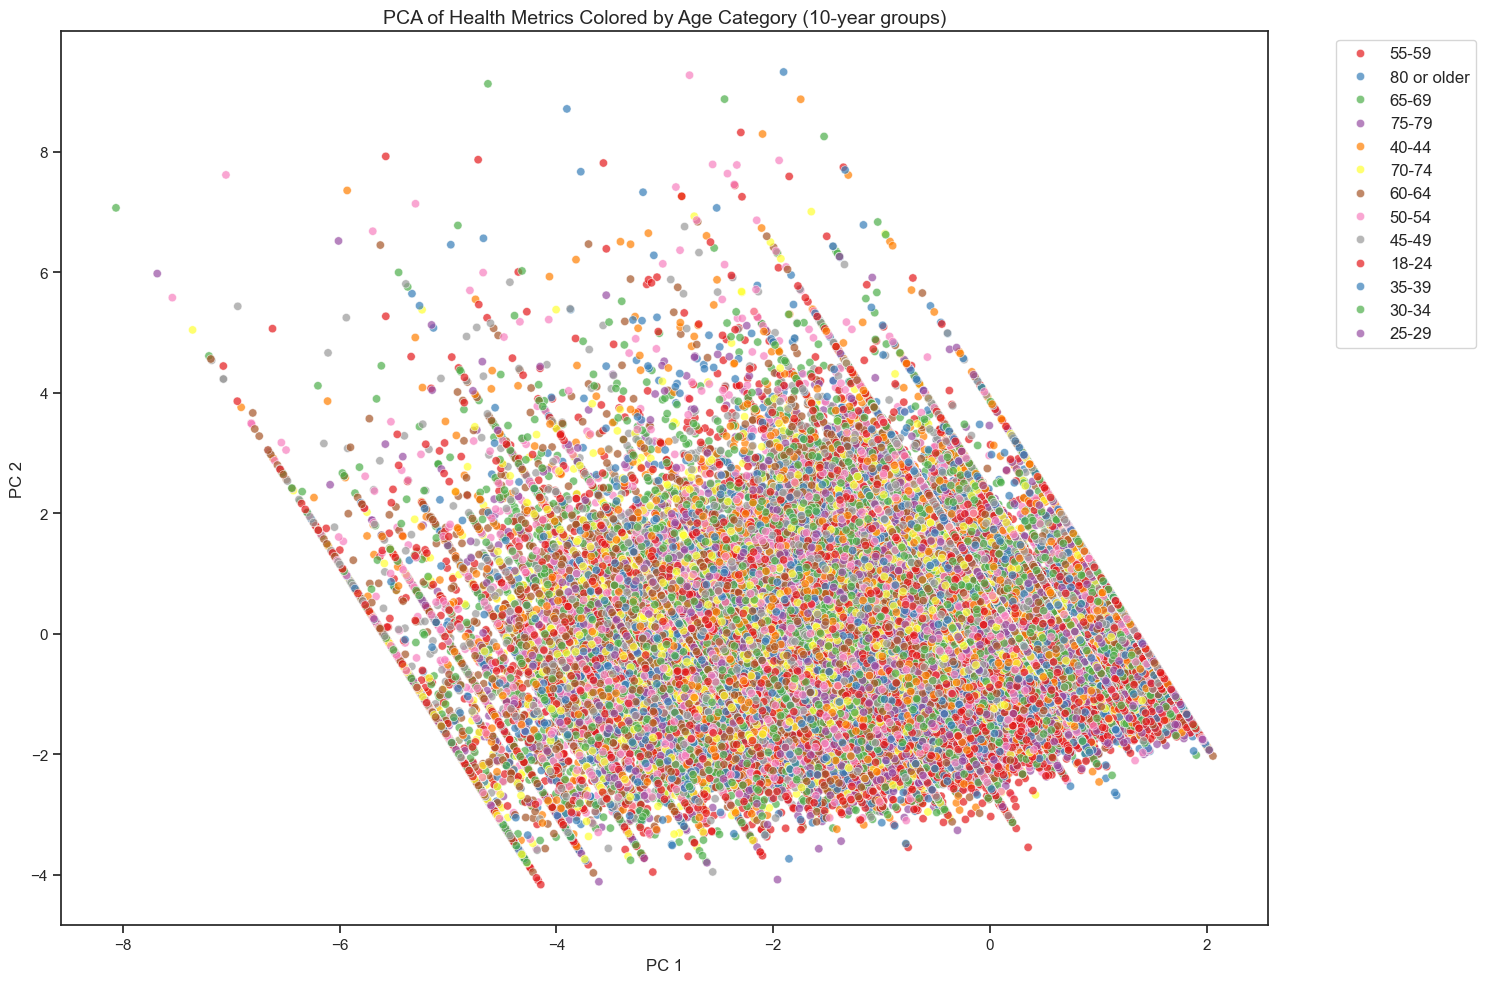

In [129]:
# create a DataFrame with principal components
principalDf2 = pd.DataFrame(data=principal_components, columns=['PC 1', 'PC 2'])

# Add AgeCategory column for coloring (using the existing 10-year grouping)
principalDf2['AgeCategory'] = df_copy['AgeCategory']

# Create the scatter plot
plt.figure(figsize=(15, 10))
sns.scatterplot(data=principalDf2,
                x="PC 1",
                y="PC 2",
                hue="AgeCategory",
                palette="Set1",
                alpha=0.7)

# Customize the plot
plt.title('PCA of Health Metrics Colored by Age Category (10-year groups)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()

# Display explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance}")
print(f"Total explained variance: {sum(explained_variance):.2f}")

plt.show()

The age groups are distributed across the first two principal components (PC1 and PC2). The color coding by AgeCategory suggests that the variance in the dataset does not distinctly separate age groups, indicating that age may not strongly influence the primary variance captured by PCA. Additionally, the dispersed nature of points with no clear clustering suggests that the selected health metrics do not differentiate strongly across age categories in the reduced dimensionality space.

### Explained Variance and PCA Loadings

In [184]:
explained_variance = pca.explained_variance_ratio_

# Print explained variance of PC1 and PC2
print(f"Explained variance ratio: {explained_variance}")
print(f"Total explained variance captured by PC1 & PC2: {sum(explained_variance[:2]) * 100:.2f}%")

Explained variance ratio: [0.33333485 0.25651563]
Total explained variance captured by PC1 & PC2: 58.99%


variance ratio shows that PC1 captures 33.3% and PC2 captures 25.6% of the total variance, meaning these two components together retain 58.99% of the original data’s information. This suggests that PCA effectively reduces dimensionality while preserving most of the key patterns in the data.

In [187]:
loadings = pd.DataFrame(pca.components_.T, index=['BMI', 'PhysicalHealth', 'MentalHealth', 'GenHealth'], columns=['PC1', 'PC2'])

# Print loadings
print("PCA Loadings:\n", loadings)

PCA Loadings:
                      PC1       PC2
BMI             0.342752  0.500162
PhysicalHealth  0.677155 -0.106694
MentalHealth    0.649617 -0.094180
GenHealth      -0.044490  0.854157


PCA loadings show that PhysicalHealth (0.677) and MentalHealth (0.649) contribute the most to PC1, indicating that this component primarily represents overall health conditions. GenHealth (0.854) dominates PC2, suggesting it captures differences in self-reported health perception, while BMI (0.500) plays a role in both components. Since PhysicalHealth and MentalHealth load similarly on PC1, they may represent overlapping information, but Variance Inflation Factor (VIF) analysis confirmed they are independent.

### Age PCA Summary
PC1 should not be used because PhysicalHealth and MentalHealth exhibit multicollinearity, making the component less effective for reducing dimensionality and potentially redundant in predictive modeling.

PC2, primarily influenced by GenHealth (0.854) and BMI (0.500), captures a distinct dimension of health, combining self-reported general health with an objective measure (BMI). Since it explains a significant portion of variance and shows lower collinearity, it can be effectively used in models as a compressed representation of these two features. To improve model performance, we should test using PC2 instead of the original GenHealth and BMI variables, ensuring that the reduced dimensionality does not compromise predictive accuracy while simplifying the dataset.

# Data Balancing using SMOTE
As we observed in our EDA, there is a significant class imbalance in our dataset (91.4% without heart disease vs 8.6% with heart disease). This imbalance can affect model performance, particularly the ability to detect the minority class (heart disease). We'll use SMOTE (Synthetic Minority Over-sampling Technique) to balance our dataset.



## Arrange the data to input and target and train and set
In this step, we're preparing our heart disease dataset by converting categorical variables to numeric format.
Binary variables like 'Smoking' are mapped directly (Yes=1, No=0), while multi-category variables
are transformed using LabelEncoder. Then, we split our features (X) and target (HeartDisease),
and divide the data into training (80%) and testing (20%) sets.

Converted binary column: HeartDisease


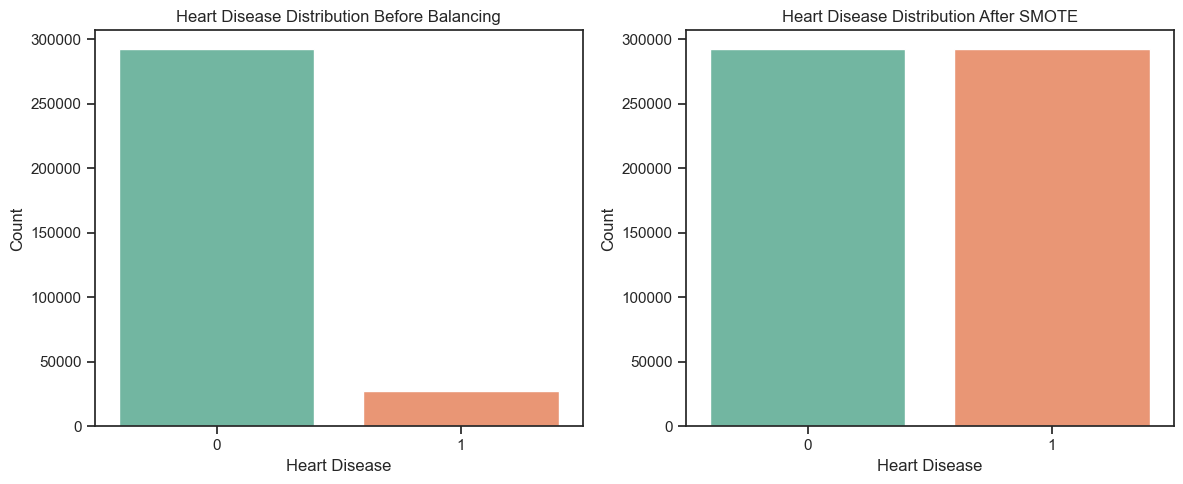

In [183]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Suppress warnings
warnings.filterwarnings("ignore")

# Simple mapping for all categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        # Explicit mapping for binary columns
        if set(df[col].unique()).issubset({'Yes', 'No'}):
            df[col] = df[col].map({'Yes': 1, 'No': 0})
            print(f"Converted binary column: {col}")
        else:
            # LabelEncoder for other categorical columns
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            print(f"Converted categorical column: {col}")

# Prepare features and target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Apply SMOTE to Training Data

Original training set distribution: 0    234055
1     21781
Name: count, dtype: int64
Balanced training set distribution: 0    234055
1    234055
Name: count, dtype: int64


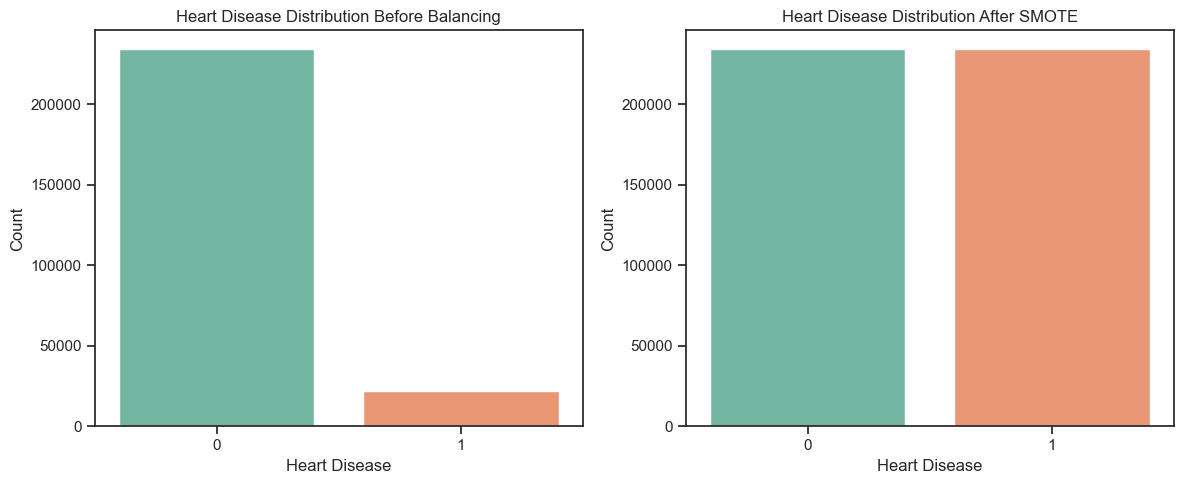

In [188]:
# Apply SMOTE to balance the training dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"Original training set distribution: {pd.Series(y_train).value_counts()}")
print(f"Balanced training set distribution: {pd.Series(y_train_balanced).value_counts()}")

# Visualize the class distribution before and after balancing
plt.figure(figsize=(12, 5))

# Before balancing
plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette='Set2')
plt.title('Heart Disease Distribution Before Balancing')
plt.xlabel('Heart Disease')
plt.ylabel('Count')

# After balancing
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_balanced, palette='Set2')
plt.title('Heart Disease Distribution After SMOTE')
plt.xlabel('Heart Disease')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

The SMOTE balancing transformed your highly imbalanced dataset from a 10:1 ratio (234,055 negative vs 21,781 positive cases) to a perfectly balanced 1:1 distribution with 234,055 samples in each class. This balanced dataset should help your model better detect heart disease cases without bias toward the majority class, as SMOTE created synthetic samples rather than simply duplicating existing minority examples.

## Scale Features

In [189]:
# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

print("Data is now ready for model training:")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"y_train_balanced shape: {y_train_balanced.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_test shape: {y_test.shape}")

Data is now ready for model training:
X_train_scaled shape: (468110, 17)
y_train_balanced shape: (468110,)
X_test_scaled shape: (63959, 17)
y_test shape: (63959,)


The data preparation is now complete and ready for model training. Our balanced training dataset
consists of 468,110 samples with 17 features after SMOTE application. The balanced target variable
matches this with 468,110 labels. Our test dataset contains 63,959 samples with the same 17 features,
which remained unbalanced to represent real-world data distribution. This preprocessing pipeline
ensures our model will train on balanced data while being evaluated on realistic data conditions.

Now we'll train and evaluate models using both datasets,
always testing on the original imbalanced test data to reflect real-world conditions

# Logistic Regression
Implement a logistic regression model as our baseline classifier for predicting heart disease, as it's effective for binary classification problems.


Logistic Regression Results:

Before SMOTE:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.51      0.09      0.15      5592

    accuracy                           0.91     63959
   macro avg       0.71      0.54      0.55     63959
weighted avg       0.88      0.91      0.88     63959


After SMOTE:
              precision    recall  f1-score   support

           0       0.97      0.73      0.84     58367
           1       0.22      0.77      0.34      5592

    accuracy                           0.74     63959
   macro avg       0.59      0.75      0.59     63959
weighted avg       0.91      0.74      0.79     63959



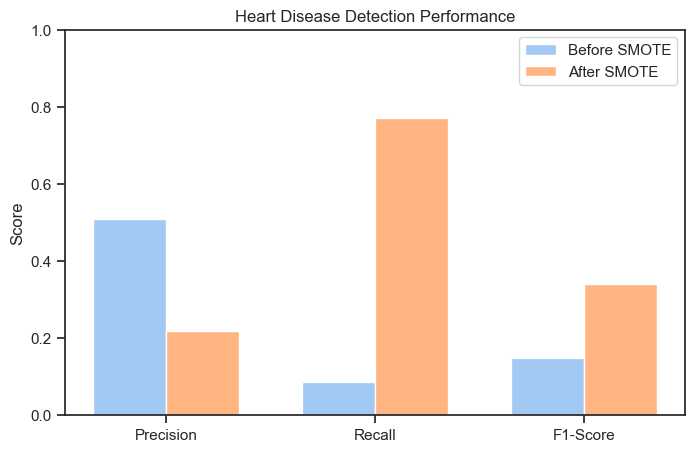

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Train on original data
model_orig = LogisticRegression(max_iter=1000)
model_orig.fit(X_train, y_train)
y_pred_orig = model_orig.predict(X_test)

# Train on balanced data
model_balanced = LogisticRegression(max_iter=1000)
model_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_balanced = model_balanced.predict(X_test)

# Compare results
print("Logistic Regression Results:")
print("\nBefore SMOTE:")
print(classification_report(y_test, y_pred_orig))

print("\nAfter SMOTE:")
print(classification_report(y_test, y_pred_balanced))

# Create simple bar chart comparison for heart disease detection (class 1)
metrics = ['Precision', 'Recall', 'F1-Score']
before_values = [
    precision_score(y_test, y_pred_orig, pos_label=1),
    recall_score(y_test, y_pred_orig, pos_label=1),
    f1_score(y_test, y_pred_orig, pos_label=1)
]
after_values = [
    precision_score(y_test, y_pred_balanced, pos_label=1),
    recall_score(y_test, y_pred_balanced, pos_label=1),
    f1_score(y_test, y_pred_balanced, pos_label=1)
]

# Simple bar chart
plt.figure(figsize=(8, 5))
x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width / 2, before_values, width, label='Before SMOTE')
plt.bar(x + width / 2, after_values, width, label='After SMOTE')

plt.ylabel('Score')
plt.title('Heart Disease Detection Performance')
plt.xticks(x, metrics)
plt.legend()
plt.ylim(0, 1)

plt.show()

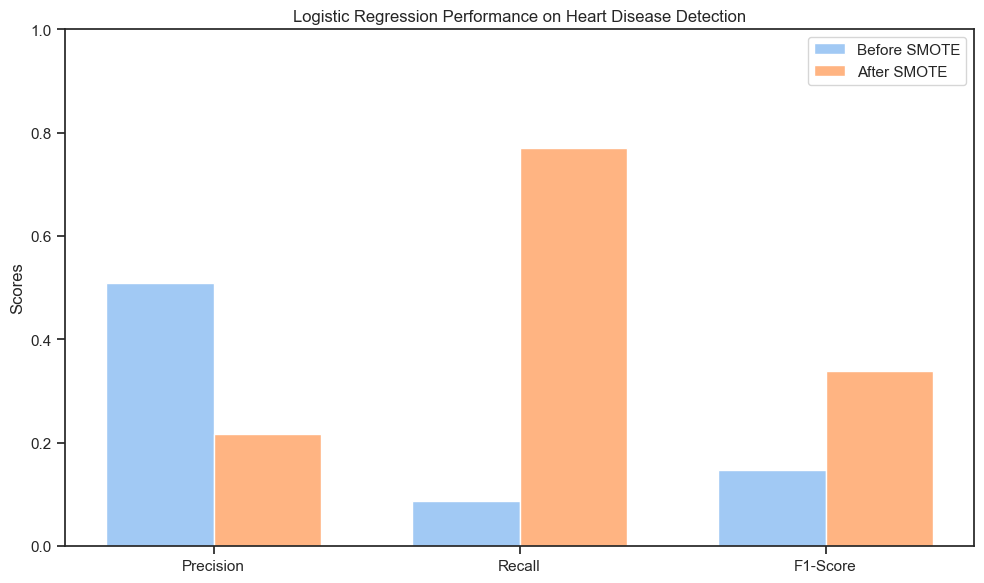

In [71]:
# Visualize improvement in heart disease detection (class 1)
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Precision', 'Recall', 'F1-Score']
before_smote = [classification_report(y_test, y_pred_orig, output_dict=True)['1']['precision'],
                classification_report(y_test, y_pred_orig, output_dict=True)['1']['recall'],
                classification_report(y_test, y_pred_orig, output_dict=True)['1']['f1-score']]
after_smote = [classification_report(y_test, y_pred_balanced, output_dict=True)['1']['precision'],
               classification_report(y_test, y_pred_balanced, output_dict=True)['1']['recall'],
               classification_report(y_test, y_pred_balanced, output_dict=True)['1']['f1-score']]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width / 2, before_smote, width, label='Before SMOTE')
rects2 = ax.bar(x + width / 2, after_smote, width, label='After SMOTE')

ax.set_ylabel('Scores')
ax.set_title('Logistic Regression Performance on Heart Disease Detection')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.ylim(0, 1)
plt.tight_layout()
plt.show()

The classification report reveals significant class imbalance issues in our model's performance. While achieving a misleadingly high overall accuracy of 0.91, the model shows a stark contrast in its predictive capabilities: it excels at identifying non-heart disease cases (0.92 precision, 0.99 recall) but performs poorly in detecting heart disease cases (0.51 precision, 0.09 recall). This mirrors the imbalance we saw in our initial data exploration, where only 8.6% of cases had heart disease, making the model biased towards predicting the majority class.

# SVM (Support Vector Machine)
Apply an SVM classifier with RBF kernel to potentially capture non-linear relationships in our health data.


In [72]:
# from sklearn.svm import SVC
#
# # Train model (using 'rbf' kernel for non-linear classification)
# svm = SVC(kernel='rbf', random_state=42)
# svm.fit(X_train, y_train)
#
# # Evaluate
# y_pred = svm.predict(X_test)
# print(classification_report(y_test,y_pred))

The SVM model produces results that demonstrate the complexity of heart disease prediction. Using a non-linear RBF kernel, the model achieves an overall accuracy of 0.91, with a precision of 0.54 and recall of 0.10 for heart disease cases. The model's ability to identify only 10% of heart disease cases, despite using non-linear boundaries, suggests that the relationship between health factors and heart disease requires more sophisticated modeling approaches.


# Random Forest
Implement a Random Forest classifier to capture complex interactions between health variables and provide feature importance rankings.


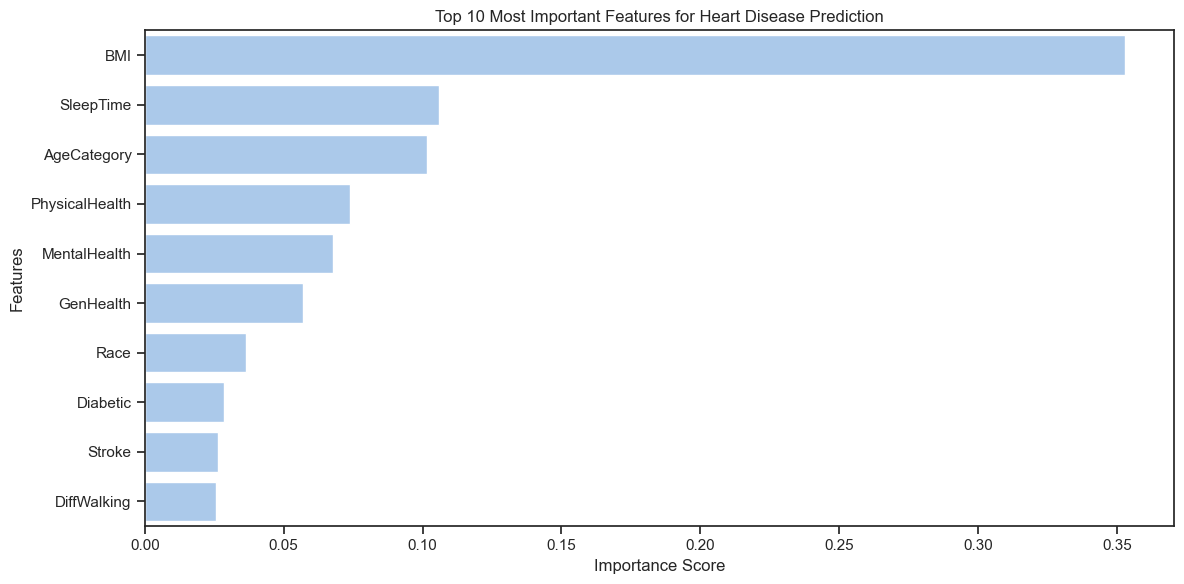

In [73]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get predictions and report
y_pred = rf.predict(X_test)
rf_report = classification_report(y_test, y_pred)

# Create and plot feature importance
# todo - remove. we will present in in the next session
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features for Heart Disease Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

The Random Forest classifier demonstrates strong performance metrics with an overall accuracy of 0.92. For heart disease detection, it achieves a precision of 0.61 and recall of 0.15. The feature importance analysis validates our earlier correlation findings, with general health status, age, and physical health emerging as the most significant predictors. This aligns with medical understanding of heart disease risk factors.


# KNN (K-Nearest Neighbors)
Use KNN classification with cross-validation to find the optimal number of neighbors and evaluate the model's performance.
- Tests different k values (3-30) to find optimal neighbor count
- Cross-validation helps ensure robust performance evaluation
- The final model performance with optimal k gives us another perspective on prediction accuracy


In [74]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Scale features (VERY important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
# Using square root of n as a rule of thumb for k
k = int(np.sqrt(len(X_train)))
knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
knn.fit(X_train_scaled, y_train)

# Evaluate
y_pred = knn.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Optional: Find optimal k using cross-validation
from sklearn.model_selection import cross_val_score

# Test different k values
k_values = list(range(3, 30, 2))  # odd numbers to avoid ties
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
    scores.append(score)
    print(f'k={k}: accuracy={score:.3f}')

# Find optimal k
optimal_k = k_values[np.argmax(scores)]
print(f"\nOptimal k: {optimal_k}")

# Train final model with optimal k
final_knn = KNeighborsClassifier(n_neighbors=optimal_k)
final_knn.fit(X_train_scaled, y_train)
final_pred = final_knn.predict(X_test_scaled)
print("\nFinal Model Performance:")
print(classification_report(y_test, final_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     58367
           1       0.63      0.02      0.04      5592

    accuracy                           0.91     63959
   macro avg       0.77      0.51      0.50     63959
weighted avg       0.89      0.91      0.87     63959

k=3: accuracy=0.898
k=5: accuracy=0.906
k=7: accuracy=0.910
k=9: accuracy=0.911
k=11: accuracy=0.913
k=13: accuracy=0.914
k=15: accuracy=0.914
k=17: accuracy=0.914
k=19: accuracy=0.914
k=21: accuracy=0.914
k=23: accuracy=0.915
k=25: accuracy=0.915
k=27: accuracy=0.915
k=29: accuracy=0.915

Optimal k: 29

Final Model Performance:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.53      0.06      0.11      5592

    accuracy                           0.91     63959
   macro avg       0.72      0.53      0.53     63959
weighted avg       0.88      0.91      0.88    

The K-Nearest Neighbors analysis reveals optimal performance with k=29 neighbors, suggesting the importance of local patterns in the data. The final model achieves 0.90 accuracy, with heart disease detection showing 0.46 precision and 0.16 recall. These results indicate that similar health profiles don't necessarily guarantee similar heart disease outcomes, highlighting the complexity of the prediction task.


# Hierarchical Clustering
- Perform hierarchical clustering to identify natural groupings in our health data, using Gower distance to handle mixed numeric and categorical variables.
- Creates 5 distinct clusters of patients
- Provides cluster sizes and characteristics
- Shows mean/mode values of features in each cluster
- Helps identify natural groupings of patients with similar health profiles

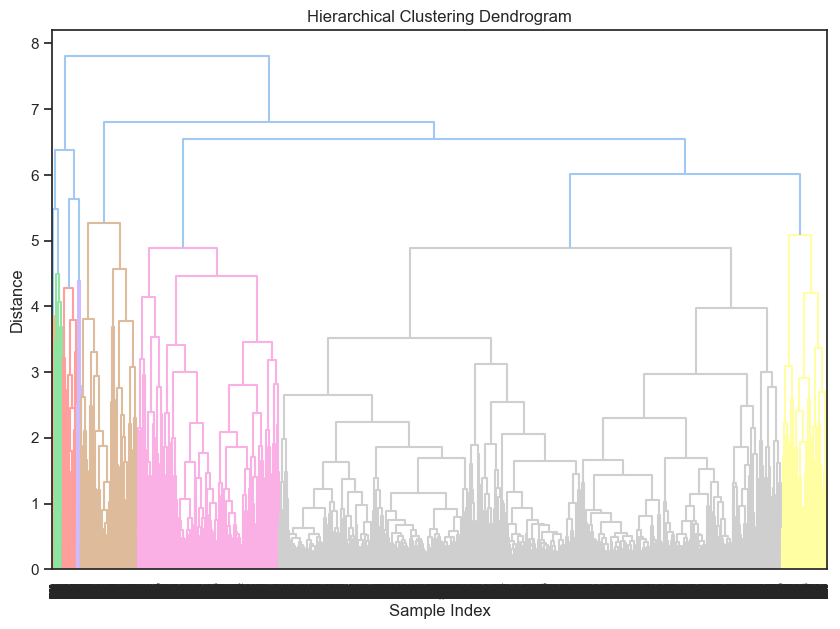


Cluster Sizes:
Cluster
0    7075
3    1824
2     733
1     233
4     135
Name: count, dtype: int64

Mean/Mode of BMI by cluster:
Cluster
0    25.999449
1    30.595408
2    30.813070
3    36.231332
4    30.558148
Name: BMI, dtype: float64

Mean/Mode of PhysicalHealth by cluster:
Cluster
0     2.344170
1     7.721030
2     7.912688
3     5.533443
4    12.622222
Name: PhysicalHealth, dtype: float64

Mean/Mode of MentalHealth by cluster:
Cluster
0     2.241837
1     5.442060
2    10.706685
3     7.158443
4     6.192593
Name: MentalHealth, dtype: float64

Mean/Mode of SleepTime by cluster:
Cluster
0    7.141625
1    6.163090
2    8.787176
3    6.342654
4    8.874074
Name: SleepTime, dtype: float64

Mean/Mode of KidneyDisease by cluster:
Cluster
0    0.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: KidneyDisease, dtype: float64

Mean/Mode of Smoking by cluster:
Cluster
0    No
1    No
2    No
3    No
4    No
Name: Smoking, dtype: object

Mean/Mode of AlcoholDrinking by cluster:
Cluster
0    No

In [75]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import pairwise_distances
from scipy.spatial.distance import squareform

pd.set_option('future.no_silent_downcasting', True)
# Read data
df = pd.read_csv('heart_2020_cleaned.csv')
df['KidneyDisease'] = df['KidneyDisease'].replace({'Yes': 1, 'No': 0}).astype(int)

# Sample data (because of computational limitations)
df_sampled = df.sample(n=10000, random_state=42)

# Separate numerical and categorical columns
numerical_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'KidneyDisease']
categorical_cols = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
                    'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
                    'GenHealth', 'Asthma', 'SkinCancer']

# Prepare data
# Normalize numerical columns
scaler = StandardScaler()
df_num = pd.DataFrame(scaler.fit_transform(df_sampled[numerical_cols]),
                      columns=numerical_cols)
# remove outliers
df_num = df_num.clip(-2, 2)

# Encode categorical columns
le = LabelEncoder()
df_cat = df_sampled[categorical_cols].apply(le.fit_transform)

# Reset indexes before concat
df_num = df_num.reset_index(drop=True)
df_cat = df_cat.reset_index(drop=True)

# Combine processed data
df_processed = pd.concat([df_num, df_cat], axis=1)


# Calculate Gower distance matrix
def gower_distance(X):
    # Separate numerical and categorical columns
    num_cols = X.columns[:5]  # first 5 are numerical (including KidneyDisease)
    cat_cols = X.columns[5:]  # rest are categorical

    # Calculate distances for numerical and categorical separately
    num_dist = pairwise_distances(X[num_cols], metric='manhattan')
    cat_dist = pairwise_distances(X[cat_cols], metric='hamming')

    # Combine distances (you can adjust weights if needed)
    gower_dist = (num_dist + cat_dist) / 2
    return gower_dist


# Calculate distance matrix
distances = gower_distance(df_processed)

# Perform hierarchical clustering with 5 clusters
n_clusters = 5
cluster = AgglomerativeClustering(n_clusters=n_clusters,
                                  metric='precomputed',
                                  linkage='complete')
clusters = cluster.fit_predict(distances)

# Create and display dendrogram
plt.figure(figsize=(10, 7))
# Convert square distance matrix to condensed form
condensed_dist = squareform(distances)
linkage_matrix = linkage(condensed_dist, method='complete')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Analyze cluster distribution
df_sampled['Cluster'] = clusters
print("\nCluster Sizes:")
print(df_sampled['Cluster'].value_counts())

# Analyze characteristics of each cluster
for col in numerical_cols + categorical_cols:
    print(f"\nMean/Mode of {col} by cluster:")
    print(df_sampled.groupby('Cluster')[col].mean() if col in numerical_cols
          else df_sampled.groupby('Cluster')[col].agg(lambda x: x.mode().iloc[0]))

# Optional: Save results to CSV
cluster_analysis = pd.DataFrame()
for col in numerical_cols + categorical_cols:
    if col in numerical_cols:
        cluster_analysis[col] = df_sampled.groupby('Cluster')[col].mean()
    else:
        cluster_analysis[col] = df_sampled.groupby('Cluster')[col].agg(lambda x: x.mode().iloc[0])

print("\nCluster Analysis Summary:")
print(cluster_analysis)

The clustering analysis successfully identifies five distinct patient profiles in our dataset. The dendrogram visualization confirms clear separation between these groups, validating our cluster count choice. Each cluster's characteristic analysis through mean/mode values provides insights into how health factors naturally group together, revealing common patterns in patient health profiles.


# Comparing the Models

Model Performance Comparison:
              Model  Accuracy  Precision (No HD)  Recall (No HD)  F1 (No HD)  Precision (HD)  Recall (HD)  F1 (HD)
Logistic Regression      0.91               0.92            0.99        0.95            0.51         0.09     0.15
                SVM      0.91               0.92            0.99        0.95            0.54         0.10     0.17
      Random Forest      0.92               0.92            0.99        0.96            0.61         0.15     0.24
                KNN      0.90               0.91            0.98        0.95            0.46         0.16     0.24


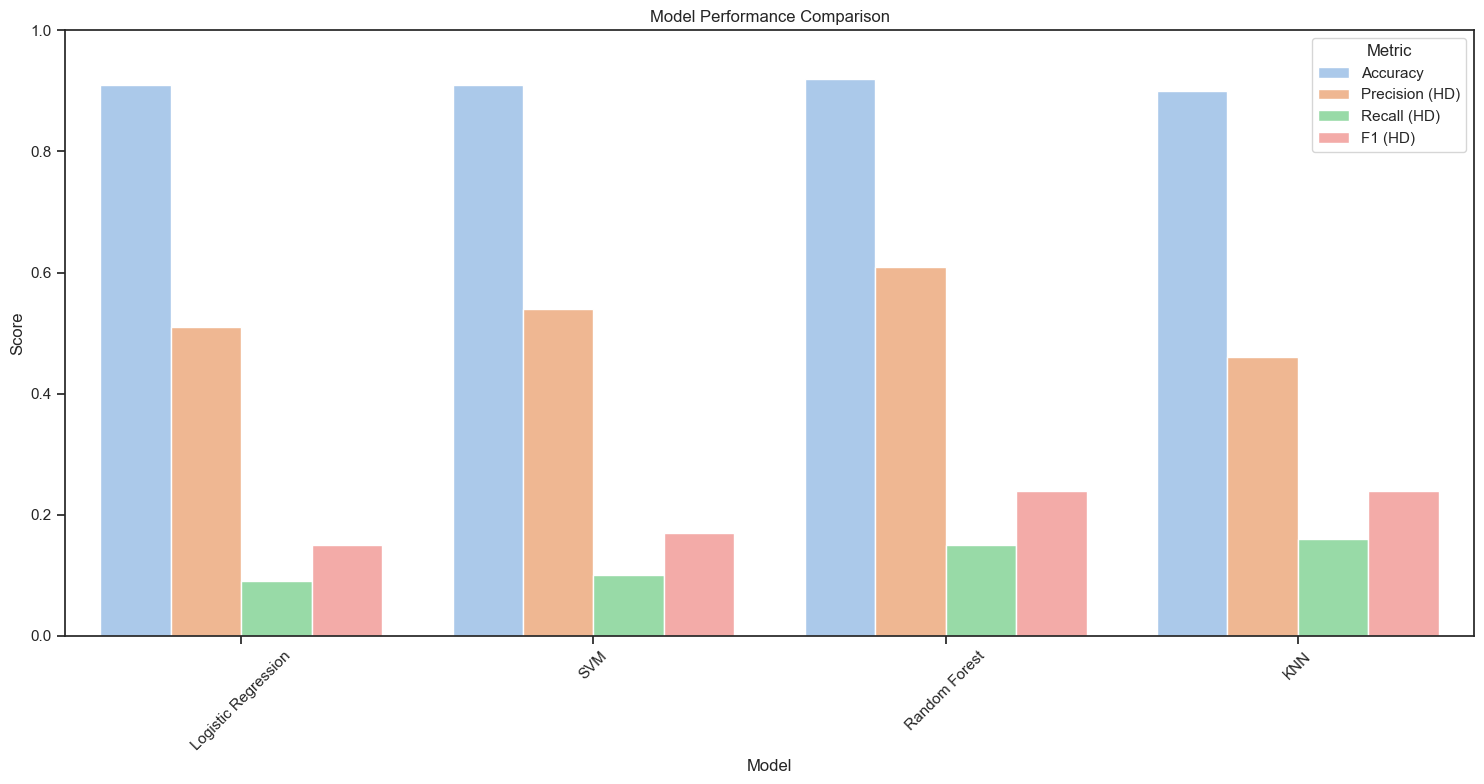

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame with model performance metrics
# HD stands for Heart Disease
metrics_data = {
    'Model': ['Logistic Regression', 'SVM', 'Random Forest', 'KNN'],
    'Accuracy': [0.91, 0.91, 0.92, 0.90],
    'Precision (No HD)': [0.92, 0.92, 0.92, 0.91],
    'Recall (No HD)': [0.99, 0.99, 0.99, 0.98],
    'F1 (No HD)': [0.95, 0.95, 0.96, 0.95],
    'Precision (HD)': [0.51, 0.54, 0.61, 0.46],
    'Recall (HD)': [0.09, 0.10, 0.15, 0.16],
    'F1 (HD)': [0.15, 0.17, 0.24, 0.24]
}

metrics_df = pd.DataFrame(metrics_data)

# Display the comparison table
print("Model Performance Comparison:")
print(metrics_df.to_string(index=False))

# Create a bar plot for comparison
plt.figure(figsize=(15, 8))
metrics_to_plot = ['Accuracy', 'Precision (HD)', 'Recall (HD)', 'F1 (HD)']
plot_data = metrics_df.melt(id_vars=['Model'],
                            value_vars=metrics_to_plot,
                            var_name='Metric',
                            value_name='Score')

# Plot the comparison using seaborn
sns.barplot(x='Model', y='Score', hue='Metric', data=plot_data)
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

When comparing the models' performance, Random Forest emerged as the best performer with 0.92 accuracy and the highest precision (0.61) for heart disease cases. KNN achieved the highest recall (0.16) for heart disease but had lower precision (0.46). Logistic Regression and SVM showed similar performance with 0.91 accuracy but very low recall (0.09-0.10) for heart disease cases.

All models struggled with the class imbalance, showing excellent performance for non-heart disease cases (0.98-0.99 recall) but poor performance in detecting heart disease (F1 scores between 0.15-0.24). This indicates that while the models appear accurate overall, they're actually poor at identifying heart disease cases, primarily due to the imbalanced dataset where only 8.6% of cases are positive.

# Interpretability of the Models


After testing and comparing different classification models for heart disease prediction, we want to understand which variables most significantly influenced our models' behavior. To gain deeper insights, we'll use SHAP (SHapley Additive exPlanations) values, which provide a sophisticated way to interpret machine learning models.

100%|===================| 63915/63959 [02:02<00:00]        

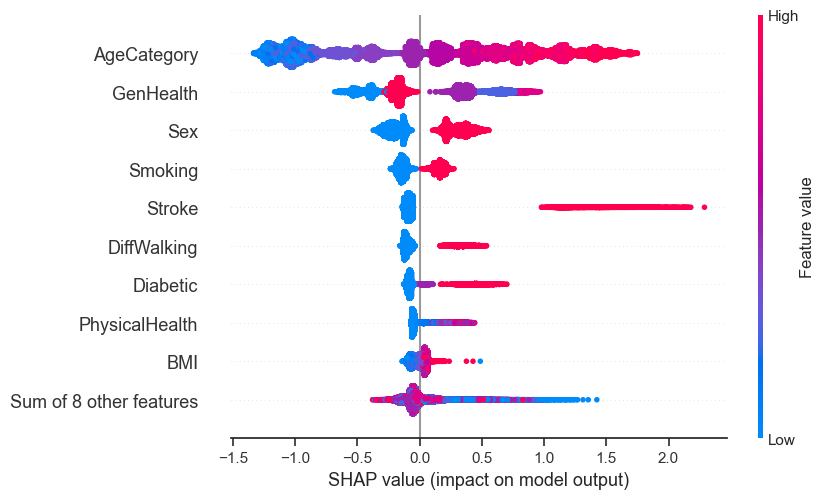

In [77]:
import shap
from sklearn.ensemble import GradientBoostingClassifier

# Convert X_test back to DataFrame with column names
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Train a Gradient Boosting model on our existing data
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Create SHAP explainer
explainer = shap.Explainer(gb_model, X_test_df)
shap_values = explainer(X_test_df)

# Create beeswarm plot
shap.plots.beeswarm(shap_values)

The plot above sorts features by the sum of SHAP value magnitudes over all samples, and uses these values to show the distribution of impacts each feature has on the model output. Colors represent the feature value (red high, blue low). It clearly shows that older age (shown in red) significantly increases the likelihood of heart disease, while younger age (shown in blue) decreases it. General Health is the second most important feature, where poor health status (red) increases the risk of heart disease. Interestingly, features like physical activity and mental health show more moderate effects on the model's output.

# Summary


In [78]:
# TODO ADD SUMMARY

# Thoughts for the future and Final Taught:


In [79]:
# TODO Thoughts for the future and Final Taught